# AI Assisted Development Survey Exploration

## 📋 Table of Contents

1. **[Columns Constants](#1-columns-constants)** - Define data structure and column groupings
2. **[Columns Mappings](#2-columns-mappings)** - Map survey questions to standardized column names  
3. **[AI Familiarity Analysis](#3-ai-familiarity-analysis)** - Overall AI knowledge distribution
4. **[AI Usage by Experience Level](#4-ai-usage-by-experience-level)** - Adoption patterns across experience groups
5. **[Most Used AI Tools](#5-most-used-ai-tools)** - Popular AI tools in development workflow
6. **[Programming Languages Analysis](#6-programming-languages-analysis)** - Language preferences and usage
7. **[Most Common AI Tool Uses](#7-most-common-ai-tool-uses)** - Tasks developers use AI tools for
8. **[AI Tool Uses by Experience Groups](#8-ai-tool-uses-by-experience-groups)** - Cross-analysis of tasks and experience
9. **[AI IDE Modes Usage Analysis](#9-ai-ide-modes-usage-analysis)** - Ask, Edit, and Agent mode adoption
10. **[AI IDE Perceptions and Attitudes Analysis](#10-ai-ide-perceptions-and-attitudes-analysis)** - Developer sentiments and concerns

---

In [484]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List, Tuple

ai_assisted_development_data = pl.read_csv("survey_responses.csv")
ai_assisted_development_data.drop_in_place(name="Timestamp")
ai_assisted_development_data

What is your primary role within the company?,How many years of professional software development experience do you have?,Which programming languages do you regularly use for development? (Select all that apply),"For the programming languages you selected above, which associated build tools, package managers, or frameworks do you regularly use?",Which Integrated Development Environments (IDEs) or code editors do you primarily use for development? (Select all that apply),How familiar are you with Artificial Intelligence (AI) technologies in general?,"Have you used any AI-powered tools or services to aid your work? (e.g., ChatGPT, Copilot for general tasks, other generative AI models).","If """"Yes"""" to the previous question, which general AI tools have you used in your development workflow? (e.g., ChatGPT, Copilot for general tasks, other generative AI models). Please specify how you use them.",What tasks do you primarily use general AI tools for? (Select all that apply),AI tools significantly improve my productivity.,AI tools help me write higher quality code.,I trust the output generated by AI tools.,I am concerned about data privacy when using AI tools for work.,"Are you currently using an AI-powered IDE or an IDE with integrated AI coding assistants (e.g., Cursor, GitHub Copilot, others)?",Which AI-powered IDE(s) or integrated AI assistant(s) do you use? (Select all that apply),"""""Ask"""" mode (Natural language queries for code, explanations)","""""Edit"""" mode (AI-assisted refactoring, bug fixing, code modification)","""""Agent"""" mode (AI autonomously performs tasks based on high-level instructions)",Generating unit tests,Generating code comments/documentation,AI-powered IDEs/assistants make me more productive.,AI-powered IDEs/assistants help me learn new APIs/libraries faster.,The code generated by AI-powered IDEs/assistants is generally high quality.,The code generated by AI-powered IDEs/assistants is generally high quality._duplicated_0,I spend less time searching for solutions online when using an AI-powered IDE/assistant.,I find myself relying too much on AI-powered IDEs/assistants.,The AI features integrate seamlessly with my existing workflow.,I am concerned about the security of my code/data when using cloud-based AI IDEs/assistants.,What are the biggest challenges or frustrations you face when using AI-powered IDEs/assistants?,Do you have any other comments or suggestions regarding the use of AI tools or AI-powered IDEs in our company?,What are the primary reasons you are NOT using an AI-powered IDE or integrated AI assistant? (Select all that apply),Do you have any other comments or suggestions regarding the use of AI tools or AI-powered IDEs in our company?_duplicated_0,"Which general AI tools have you used in your development workflow? (e.g., ChatGPT, Copilot for general tasks, other generative AI models)."
str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str
"""Data Scientist / AI / Machine …","""1-3 years""","""Python""",""".Net""","""VS Code, Visual Studio""","""Very familiar""","""Yes""","""Code""","""Generating code snippets, Expl…",4,3,2,3,"""Yes""","""GitHub Copilot (within VS Code…",3,1,2,3,4,3,3,3,3,4,3,3,2,"""Needs more context to get it r…","""No""","""Worried about code quality/cor…","""No""",null
"""QA Engineer / Tester""","""More than 10 years""","""JavaScript, Python""","""Postman""","""VS Code, PyCharm""","""Slightly familiar""","""Yes""",null,"""Generating code snippets, Lear…",3,1,2,2,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Not familiar with them""",null,"""ChatGpt, LuzIA, perplexity"""
"""Full-stack Developer""","""More than 10 years""","""Java, JavaScript, TypeScript, …","""Springboot, Maven, Graddle, No…","""VS Code, IntelliJ IDEA""","""Very familiar""","""Yes""",null,"""Generating code snippets, Expl…",4,4,1,3,"""Yes""","""GitHub Copilot (within VS Code…

## 0. Configuration Constants

In [485]:
# Global plot size configurations
WIDE_PLOT_SIZE = (12, 8)  # For horizontal bar charts, experience comparisons
TALL_PLOT_SIZE = (10, 12)  # For vertical lists, many categories

In [486]:
# Catppuccin Color Schemes - Mocha variant (dark theme)
CATPPUCCIN_MOCHA = {
    "rosewater": "#f5e0dc",
    "flamingo": "#f2cdcd",
    "pink": "#f5c2e7",
    "mauve": "#cba6f7",
    "red": "#f38ba8",
    "maroon": "#eba0ac",
    "peach": "#fab387",
    "yellow": "#f9e2af",
    "green": "#a6e3a1",
    "teal": "#94e2d5",
    "sky": "#89dceb",
    "sapphire": "#74c7ec",
    "blue": "#89b4fa",
    "lavender": "#b4befe",
    "text": "#cdd6f4",
    "subtext1": "#bac2de",
    "subtext0": "#a6adc8",
    "overlay2": "#9399b2",
    "overlay1": "#7f849c",
    "overlay0": "#6c7086",
    "surface2": "#585b70",
    "surface1": "#45475a",
    "surface0": "#313244",
    "base": "#1e1e2e",
    "mantle": "#181825",
    "crust": "#11111b",
}

# Catppuccin Color Schemes - Latte variant (light theme)
CATPPUCCIN_LATTE = {
    "rosewater": "#dc8a78",
    "flamingo": "#dd7878",
    "pink": "#ea76cb",
    "mauve": "#8839ef",
    "red": "#d20f39",
    "maroon": "#e64553",
    "peach": "#fe640b",
    "yellow": "#df8e1d",
    "green": "#40a02b",
    "teal": "#179299",
    "sky": "#04a5e5",
    "sapphire": "#209fb5",
    "blue": "#1e66f5",
    "lavender": "#7287fd",
    "text": "#4c4f69",
    "subtext1": "#5c5f77",
    "subtext0": "#6c6f85",
    "overlay2": "#7c7f93",
    "overlay1": "#8c8fa1",
    "overlay0": "#9ca0b0",
    "surface2": "#acb0be",
    "surface1": "#bcc0cc",
    "surface0": "#ccd0da",
    "base": "#eff1f5",
    "mantle": "#e6e9ef",
    "crust": "#dce0e8",
}

# Choose the theme (you can switch between 'mocha' and 'latte')
CATPPUCCIN_THEME = "mocha"
CATPPUCCIN = CATPPUCCIN_MOCHA if CATPPUCCIN_THEME == "mocha" else CATPPUCCIN_LATTE

# Create extended color palettes for different chart types
CATPPUCCIN_QUALITATIVE = [
    CATPPUCCIN["blue"],
    CATPPUCCIN["mauve"],
    CATPPUCCIN["green"],
    CATPPUCCIN["peach"],
    CATPPUCCIN["pink"],
    CATPPUCCIN["teal"],
    CATPPUCCIN["yellow"],
    CATPPUCCIN["red"],
    CATPPUCCIN["sky"],
    CATPPUCCIN["lavender"],
    CATPPUCCIN["sapphire"],
    CATPPUCCIN["maroon"],
    # Extended colors using different shades and combinations
    CATPPUCCIN["rosewater"],
    CATPPUCCIN["flamingo"],
    CATPPUCCIN["overlay2"],
    CATPPUCCIN["overlay1"],
    CATPPUCCIN["surface2"],
    CATPPUCCIN["surface1"],
    CATPPUCCIN["subtext1"],
    CATPPUCCIN["subtext0"],
    # Additional mixed tones for even more variety
    "#8be9fd",
    "#ff79c6",
    "#50fa7b",
    "#ffb86c",
    "#ff5555",
    "#bd93f9",
    "#f1fa8c",
    "#6272a4",
]

# Diverging palette (for Likert scales, sentiment analysis)
CATPPUCCIN_DIVERGING = [
    CATPPUCCIN["red"],
    CATPPUCCIN["peach"],
    CATPPUCCIN["yellow"],
    CATPPUCCIN["green"],
    CATPPUCCIN["blue"],
]

# Sequential palette (for heatmaps, single-variable gradients)
CATPPUCCIN_SEQUENTIAL = [
    CATPPUCCIN["surface0"],
    CATPPUCCIN["surface1"],
    CATPPUCCIN["surface2"],
    CATPPUCCIN["overlay0"],
    CATPPUCCIN["overlay1"],
    CATPPUCCIN["blue"],
    CATPPUCCIN["mauve"],
    CATPPUCCIN["pink"],
]

print(f"🎨 Catppuccin {CATPPUCCIN_THEME.title()} theme loaded!")
print(f"Primary colors: {', '.join(CATPPUCCIN_QUALITATIVE[:6])}")

🎨 Catppuccin Mocha theme loaded!
Primary colors: #89b4fa, #cba6f7, #a6e3a1, #fab387, #f5c2e7, #94e2d5


In [487]:
def get_extended_catppuccin_palette(n_colors: int) -> list:
    """
    Generate an extended Catppuccin color palette for any number of categories.

    Args:
        n_colors: Number of colors needed

    Returns:
        List of hex color codes
    """
    if n_colors <= len(CATPPUCCIN_QUALITATIVE):
        return CATPPUCCIN_QUALITATIVE[:n_colors]

    # If we need more colors, cycle through the palette with slight variations
    extended_palette = CATPPUCCIN_QUALITATIVE.copy()

    # Add variations by adjusting brightness/saturation
    base_colors = CATPPUCCIN_QUALITATIVE[:12]  # Original 12 colors

    while len(extended_palette) < n_colors:
        # Add lighter and darker variants
        for color in base_colors:
            if len(extended_palette) >= n_colors:
                break
            # Add a slightly modified version (this is a simple approach)
            # In a real scenario, you'd use color manipulation libraries
            extended_palette.append(color)

    return extended_palette[:n_colors]

In [488]:
def switch_catppuccin_theme(theme: str = "mocha") -> None:
    """
    Switch between Catppuccin themes and update global color variables.

    Args:
        theme: Either 'mocha' (dark) or 'latte' (light)
    """
    global \
        CATPPUCCIN_THEME, \
        CATPPUCCIN, \
        CATPPUCCIN_QUALITATIVE, \
        CATPPUCCIN_DIVERGING, \
        CATPPUCCIN_SEQUENTIAL

    if theme not in ["mocha", "latte"]:
        print("❌ Invalid theme! Choose 'mocha' or 'latte'")
        return

    CATPPUCCIN_THEME = theme
    CATPPUCCIN = CATPPUCCIN_MOCHA if theme == "mocha" else CATPPUCCIN_LATTE

    # Update color palettes
    CATPPUCCIN_QUALITATIVE = [
        CATPPUCCIN["blue"],
        CATPPUCCIN["mauve"],
        CATPPUCCIN["green"],
        CATPPUCCIN["peach"],
        CATPPUCCIN["pink"],
        CATPPUCCIN["teal"],
        CATPPUCCIN["yellow"],
        CATPPUCCIN["red"],
        CATPPUCCIN["sky"],
        CATPPUCCIN["lavender"],
        CATPPUCCIN["sapphire"],
        CATPPUCCIN["maroon"],
        # Extended colors using different shades and combinations
        CATPPUCCIN["rosewater"],
        CATPPUCCIN["flamingo"],
        CATPPUCCIN["overlay2"],
        CATPPUCCIN["overlay1"],
        CATPPUCCIN["surface2"],
        CATPPUCCIN["surface1"],
        CATPPUCCIN["subtext1"],
        CATPPUCCIN["subtext0"],
        # Additional mixed tones for even more variety
        "#8be9fd",
        "#ff79c6",
        "#50fa7b",
        "#ffb86c",
        "#ff5555",
        "#bd93f9",
        "#f1fa8c",
        "#6272a4",
    ]

    CATPPUCCIN_DIVERGING = [
        CATPPUCCIN["red"],
        CATPPUCCIN["peach"],
        CATPPUCCIN["yellow"],
        CATPPUCCIN["green"],
        CATPPUCCIN["blue"],
    ]

    CATPPUCCIN_SEQUENTIAL = [
        CATPPUCCIN["surface0"],
        CATPPUCCIN["surface1"],
        CATPPUCCIN["surface2"],
        CATPPUCCIN["overlay0"],
        CATPPUCCIN["overlay1"],
        CATPPUCCIN["blue"],
        CATPPUCCIN["mauve"],
        CATPPUCCIN["pink"],
    ]

    print(f"🎨 Switched to Catppuccin {theme.title()} theme!")
    print(f"Primary colors: {', '.join(CATPPUCCIN_QUALITATIVE[:6])}")


# Example usage:
# switch_catppuccin_theme('latte')  # Switch to light theme
switch_catppuccin_theme("mocha")  # Switch back to dark theme

🎨 Switched to Catppuccin Mocha theme!
Primary colors: #89b4fa, #cba6f7, #a6e3a1, #fab387, #f5c2e7, #94e2d5


## 1. Columns Constants

In [489]:
BASE_COLUMNS = [
    "role",
    "experience_years",
    "programming_languages",
    "tools_frameworks",
    "ides_editors",
    "ai_familiarity",
    "reasons_not_using_ai_ide",
    "additional_comments",
]

BASIC_AI_USAGE_COLUMNS = BASE_COLUMNS + [
    "ai_tools_used",
    "ai_tool_tasks",
    "ai_improves_productivity",
    "ai_improves_code_quality",
    "ai_trust",
    "ai_privacy_concern",
]


AI_IDE_USAGE_COLUMNS = BASIC_AI_USAGE_COLUMNS + [
    "ai_ide_types",
    "uses_ask_mode",
    "uses_edit_mode",
    "uses_agent_mode",
    "generates_unit_tests",
    "generates_documentation",
    "ai_ide_productivity",
    "ai_ide_learning",
    "ai_ide_code_quality",
    "ai_ide_code_quality_dup",
    "ai_ide_reduces_search",
    "ai_ide_over_reliance",
    "ai_ide_workflow_integration",
    "ai_ide_security_concern",
    "ai_ide_challenges",
    "additional_comments",
    "reasons_not_using_ai_ide",
    "additional_comments_dup",
    "ai_tools_workflow",
]

## 2. Columns Mappings

In [490]:
column_mapping = {
    "What is your primary role within the company?": "role",
    "How many years of professional software development experience do you have?": "experience_years",
    "Which programming languages do you regularly use for development? (Select all that apply)": "programming_languages",
    "For the programming languages you selected above, which associated build tools, package managers, or frameworks do you regularly use?": "tools_frameworks",
    "Which Integrated Development Environments (IDEs) or code editors do you primarily use for development? (Select all that apply)": "ides_editors",
    "How familiar are you with Artificial Intelligence (AI) technologies in general?": "ai_familiarity",
    "Have you used any AI-powered tools or services to aid your work? (e.g., ChatGPT, Copilot for general tasks, other generative AI models).": "used_ai_tools",
    'If ""Yes"" to the previous question, which general AI tools have you used in your development workflow? (e.g., ChatGPT, Copilot for general tasks, other generative AI models). Please specify how you use them.': "ai_tools_used",
    "What tasks do you primarily use general AI tools for? (Select all that apply)": "ai_tool_tasks",
    "AI tools significantly improve my productivity.": "ai_improves_productivity",
    "AI tools help me write higher quality code.": "ai_improves_code_quality",
    "I trust the output generated by AI tools.": "ai_trust",
    "I am concerned about data privacy when using AI tools for work.": "ai_privacy_concern",
    "Are you currently using an AI-powered IDE or an IDE with integrated AI coding assistants (e.g., Cursor, GitHub Copilot, others)?": "uses_ai_ide",
    "Which AI-powered IDE(s) or integrated AI assistant(s) do you use? (Select all that apply)": "ai_ide_types",
    '""Ask"" mode (Natural language queries for code, explanations)': "uses_ask_mode",
    '""Edit"" mode (AI-assisted refactoring, bug fixing, code modification)': "uses_edit_mode",
    '""Agent"" mode (AI autonomously performs tasks based on high-level instructions)': "uses_agent_mode",
    "Generating unit tests": "generates_unit_tests",
    "Generating code comments/documentation": "generates_documentation",
    "AI-powered IDEs/assistants make me more productive.": "ai_ide_productivity",
    "AI-powered IDEs/assistants help me learn new APIs/libraries faster.": "ai_ide_learning",
    "The code generated by AI-powered IDEs/assistants is generally high quality.": "ai_ide_code_quality",
    "The code generated by AI-powered IDEs/assistants is generally high quality._duplicated_0": "ai_ide_code_quality_dup",
    "I spend less time searching for solutions online when using an AI-powered IDE/assistant.": "ai_ide_reduces_search",
    "I find myself relying too much on AI-powered IDEs/assistants.": "ai_ide_over_reliance",
    "The AI features integrate seamlessly with my existing workflow.": "ai_ide_workflow_integration",
    "I am concerned about the security of my code/data when using cloud-based AI IDEs/assistants.": "ai_ide_security_concern",
    "What are the biggest challenges or frustrations you face when using AI-powered IDEs/assistants?": "ai_ide_challenges",
    "Do you have any other comments or suggestions regarding the use of AI tools or AI-powered IDEs in our company?": "additional_comments",
    # Additional columns found in the data
    "What are the primary reasons you are NOT using an AI-powered IDE or integrated AI assistant? (Select all that apply)": "reasons_not_using_ai_ide",
    "Do you have any other comments or suggestions regarding the use of AI tools or AI-powered IDEs in our company?_duplicated_0": "additional_comments_dup",
    "Which general AI tools have you used in your development workflow? (e.g., ChatGPT, Copilot for general tasks, other generative AI models).": "ai_tools_workflow",
}

ai_assisted_development_data = ai_assisted_development_data.rename(column_mapping)

## 3. AI Familiarity Analysis


In [491]:
def calculate_ai_familiarity_distribution(df: pl.DataFrame) -> pl.DataFrame:
    """
    Calculate AI familiarity distribution with counts and percentages.

    Args:
        df: The main dataframe containing survey responses

    Returns:
        DataFrame with ai_familiarity, count, and percentage columns
    """
    ai_familiarity_counts = (
        df["ai_familiarity"].value_counts().sort(by="count", descending=True)
    )
    ai_familiarity_counts.columns = ["ai_familiarity", "count"]

    # Calculate percentages
    total_responses = ai_familiarity_counts["count"].sum()
    ai_familiarity_counts = ai_familiarity_counts.with_columns(
        (pl.col("count") / total_responses * 100).alias("percentage")
    )

    return ai_familiarity_counts


def create_ai_familiarity_pie_chart(familiarity_data: pl.DataFrame) -> None:
    """
    Create a pie chart visualization for AI familiarity distribution.

    Args:
        familiarity_data: DataFrame with ai_familiarity, count, and percentage columns
    """
    plt.figure(figsize=TALL_PLOT_SIZE)
    colors = CATPPUCCIN_QUALITATIVE[: len(familiarity_data)]  # Catppuccin colors

    wedges, texts = plt.pie(
        familiarity_data["percentage"],
        labels=familiarity_data["ai_familiarity"],
        startangle=90,
        colors=colors,
        textprops={"fontsize": 13, "weight": "bold"},
    )

    plt.title("AI Familiarity Distribution", fontsize=18, pad=30, weight="bold")
    plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

    # Add a legend with percentages
    legend_labels = [
        f"{cat}: {pct:.1f}%"
        for cat, pct in zip(
            familiarity_data["ai_familiarity"], familiarity_data["percentage"]
        )
    ]
    plt.legend(
        wedges,
        legend_labels,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.tight_layout()
    plt.show()


def analyze_ai_familiarity(df: pl.DataFrame) -> pl.DataFrame:
    """
    Complete analysis of AI familiarity distribution from survey data.

    Args:
        df: DataFrame containing survey responses

    Returns:
        DataFrame with comprehensive AI familiarity statistics
    """
    return calculate_ai_familiarity_distribution(df)


# Execute the AI familiarity analysis
ai_familiarity_stats = analyze_ai_familiarity(ai_assisted_development_data)

# Display the data table with percentages
print("AI Familiarity Distribution:")
ai_familiarity_stats

AI Familiarity Distribution:


ai_familiarity,count,percentage
str,u32,f64
"""Very familiar""",21,45.652174
"""Slightly familiar""",18,39.130435
"""Extremely familiar""",6,13.043478
"""Not familiar at all""",1,2.173913


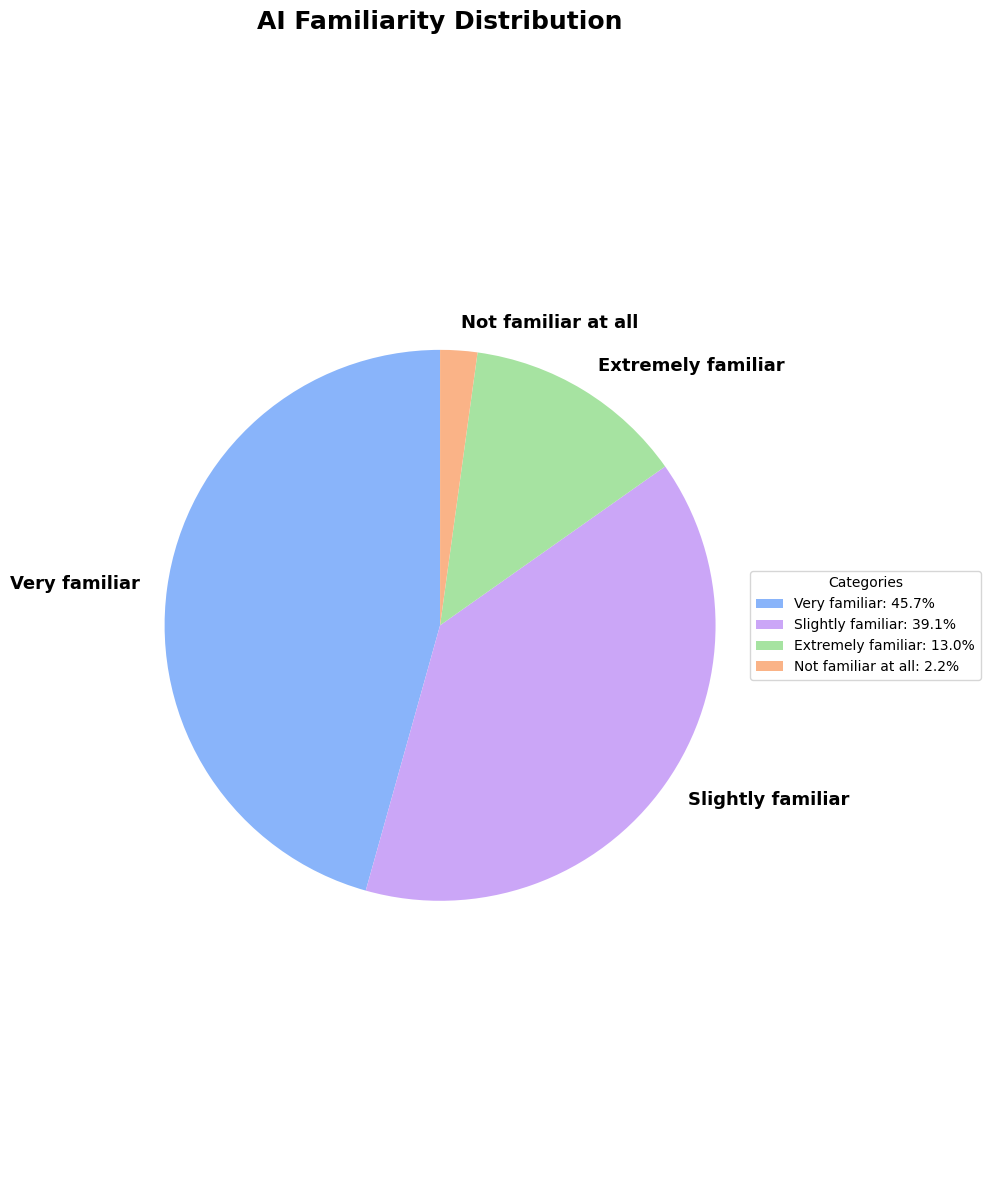

In [492]:
# Create AI familiarity pie chart visualization
create_ai_familiarity_pie_chart(ai_familiarity_stats)

## 4. AI Usage by Experience Level

In [493]:
def get_experience_groups_distribution(df: pl.DataFrame) -> pl.DataFrame:
    """
    Get the distribution of developers by years of experience.

    Args:
        df: The main dataframe containing survey responses

    Returns:
        DataFrame with experience years, count, and percentage
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    experience_distribution = (
        df.filter(pl.col("experience_years").is_not_null())
        .group_by("experience_years")
        .agg(pl.len().alias("count"))
    )

    # Add sort order and sort by it
    experience_distribution = experience_distribution.with_columns(
        pl.col("experience_years")
        .map_elements(
            lambda x: experience_order.index(x) if x in experience_order else 999,
            return_dtype=pl.Int32,
        )
        .alias("sort_order")
    ).sort("sort_order")

    total_responses = experience_distribution["count"].sum()
    experience_distribution = experience_distribution.with_columns(
        (pl.col("count") / total_responses * 100).alias("percentage")
    )

    return experience_distribution


def analyze_ai_usage_by_experience(df: pl.DataFrame) -> pl.DataFrame:
    """
    Analyze AI tool usage (both general AI tools and AI IDEs) by years of experience.

    Args:
        df: The main dataframe containing survey responses

    Returns:
        DataFrame with comprehensive AI usage statistics by experience group
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    ai_usage_by_experience = (
        df.filter(pl.col("experience_years").is_not_null())
        .group_by("experience_years")
        .agg(
            [
                pl.len().alias("total_count"),
                (pl.col("used_ai_tools") == "Yes").sum().alias("uses_general_ai_count"),
                (pl.col("uses_ai_ide") == "Yes").sum().alias("uses_ai_ide_count"),
                (pl.col("used_ai_tools") == "No").sum().alias("no_general_ai_count"),
                (pl.col("uses_ai_ide") == "No").sum().alias("no_ai_ide_count"),
            ]
        )
    )

    # Add sort order and sort by it
    ai_usage_by_experience = ai_usage_by_experience.with_columns(
        pl.col("experience_years")
        .map_elements(
            lambda x: experience_order.index(x) if x in experience_order else 999,
            return_dtype=pl.Int32,
        )
        .alias("sort_order")
    ).sort("sort_order")

    # Calculate percentages
    ai_usage_stats = ai_usage_by_experience.with_columns(
        [
            (pl.col("uses_general_ai_count") / pl.col("total_count") * 100).alias(
                "general_ai_percentage"
            ),
            (pl.col("uses_ai_ide_count") / pl.col("total_count") * 100).alias(
                "ai_ide_percentage"
            ),
            (pl.col("no_general_ai_count") / pl.col("total_count") * 100).alias(
                "no_general_ai_percentage"
            ),
            (pl.col("no_ai_ide_count") / pl.col("total_count") * 100).alias(
                "no_ai_ide_percentage"
            ),
        ]
    )

    return ai_usage_stats


def create_general_ai_visualization(df: pl.DataFrame) -> None:
    """
    Create visualization for general AI tools usage by experience groups.

    Args:
        df: DataFrame with AI usage statistics by experience
    """
    plt.figure(figsize=WIDE_PLOT_SIZE)

    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    # Sort the dataframe by the custom order
    df_sorted = df.with_columns(
        pl.col("experience_years")
        .map_elements(
            lambda x: experience_order.index(x) if x in experience_order else 999,
            return_dtype=pl.Int32,
        )
        .alias("sort_order")
    ).sort("sort_order")

    # Convert to Python lists for matplotlib
    years = df_sorted["experience_years"].to_list()
    general_ai_pct = df_sorted["general_ai_percentage"].to_list()
    no_general_ai_pct = df_sorted["no_general_ai_percentage"].to_list()

    # Plot General AI Tools Usage
    plt.bar(
        years,
        general_ai_pct,
        color=CATPPUCCIN["blue"],
        alpha=0.8,
        label="Uses General AI",
    )
    plt.bar(
        years,
        no_general_ai_pct,
        bottom=general_ai_pct,
        color=CATPPUCCIN["surface1"],
        alpha=0.8,
        label="No General AI",
    )

    plt.title("General AI Tools Usage by Experience Level", fontsize=16)
    plt.xlabel("Years of Experience")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.ylim(0, 100)
    plt.xticks(rotation=45)

    # Add percentage labels
    for i, (year, pct) in enumerate(zip(years, general_ai_pct)):
        if pct > 5:  # Only show label if percentage is significant
            plt.text(i, pct / 2, f"{pct:.1f}%", ha="center", va="center", color="black")

    plt.tight_layout()
    plt.show()


def create_ai_ide_visualization(df: pl.DataFrame) -> None:
    """
    Create visualization for AI IDE usage by experience groups.

    Args:
        df: DataFrame with AI usage statistics by experience
    """
    plt.figure(figsize=WIDE_PLOT_SIZE)

    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    # Sort the dataframe by the custom order
    df_sorted = df.with_columns(
        pl.col("experience_years")
        .map_elements(
            lambda x: experience_order.index(x) if x in experience_order else 999,
            return_dtype=pl.Int32,
        )
        .alias("sort_order")
    ).sort("sort_order")

    # Convert to Python lists for matplotlib
    years = df_sorted["experience_years"].to_list()
    ai_ide_pct = df_sorted["ai_ide_percentage"].to_list()
    no_ai_ide_pct = df_sorted["no_ai_ide_percentage"].to_list()

    # Plot AI IDE Usage
    plt.bar(
        years, ai_ide_pct, color=CATPPUCCIN["mauve"], alpha=0.8, label="Uses AI IDE"
    )
    plt.bar(
        years,
        no_ai_ide_pct,
        bottom=ai_ide_pct,
        color=CATPPUCCIN["surface1"],
        alpha=0.8,
        label="No AI IDE",
    )

    plt.title("AI IDE Usage by Experience Level", fontsize=16)
    plt.xlabel("Years of Experience")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.ylim(0, 100)
    plt.xticks(rotation=45)

    # Add percentage labels
    for i, (year, pct) in enumerate(zip(years, ai_ide_pct)):
        if pct > 5:  # Only show label if percentage is significant
            plt.text(i, pct / 2, f"{pct:.1f}%", ha="center", va="center", color="black")

    plt.tight_layout()
    plt.show()


def get_cross_tabulation(df: pl.DataFrame) -> pl.DataFrame:
    """
    Create a cross-tabulation showing the relationship between general AI usage and AI IDE usage.

    Args:
        df: The main dataframe containing survey responses

    Returns:
        DataFrame with cross-tabulation results
    """
    cross_tab = (
        df.filter(pl.col("experience_years").is_not_null())
        .group_by(["experience_years", "used_ai_tools", "uses_ai_ide"])
        .agg(pl.len().alias("count"))
        .sort(by=["experience_years", "used_ai_tools", "uses_ai_ide"])
    )

    return cross_tab


# Execute the analysis
experience_distribution = get_experience_groups_distribution(
    ai_assisted_development_data
)
ai_usage_stats = analyze_ai_usage_by_experience(ai_assisted_development_data)
cross_tab_results = get_cross_tabulation(ai_assisted_development_data)

ai_usage_stats

experience_years,total_count,uses_general_ai_count,uses_ai_ide_count,no_general_ai_count,no_ai_ide_count,sort_order,general_ai_percentage,ai_ide_percentage,no_general_ai_percentage,no_ai_ide_percentage
str,u32,u32,u32,u32,u32,i32,f64,f64,f64,f64
"""Less than 1 year""",3,3,3,0,0,0,100.0,100.0,0.0,0.0
"""1-3 years""",3,3,2,0,1,1,100.0,66.666667,0.0,33.333333
"""4-6 years""",8,8,6,0,2,2,100.0,75.0,0.0,25.0
"""7-10 years""",11,11,9,0,2,3,100.0,81.818182,0.0,18.181818
"""More than 10 years""",21,19,9,2,12,4,90.47619,42.857143,9.52381,57.142857


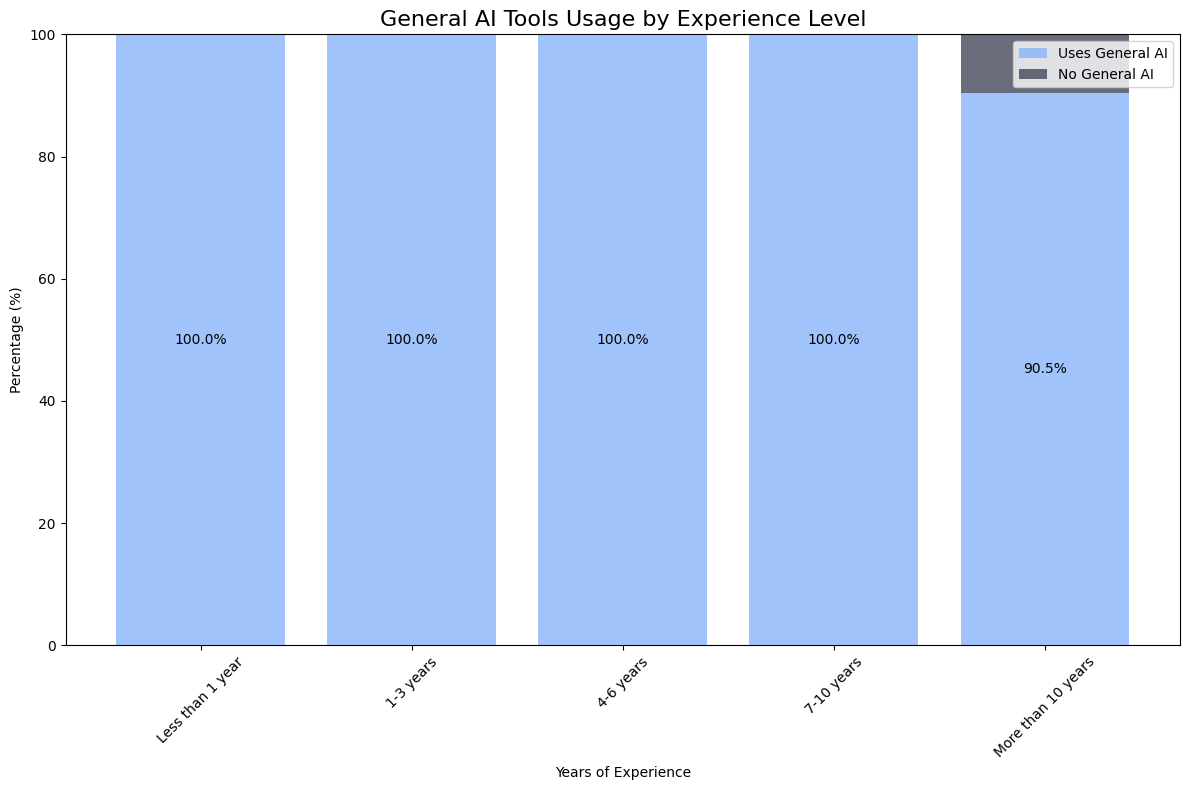

In [494]:
create_general_ai_visualization(ai_usage_stats)

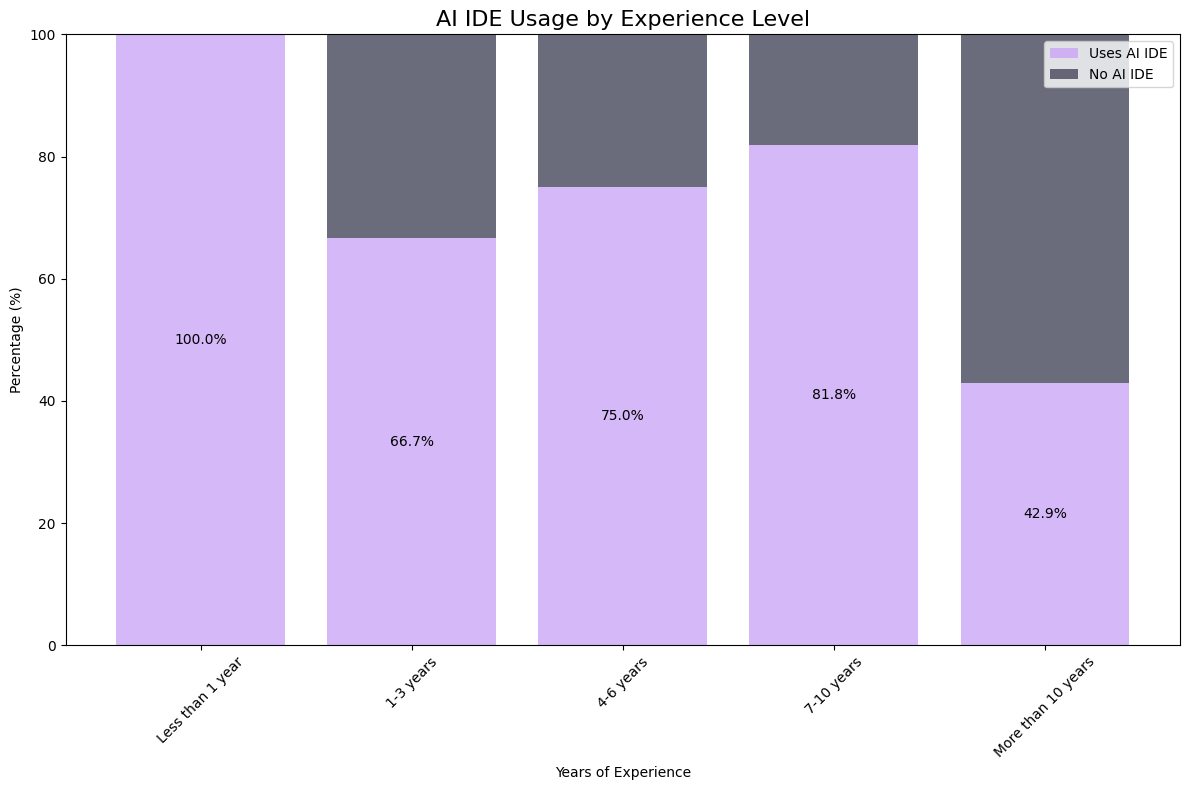

In [495]:
create_ai_ide_visualization(ai_usage_stats)

In [496]:
# Cross-tabulation: Experience vs General AI vs AI IDE
cross_tab_results

experience_years,used_ai_tools,uses_ai_ide,count
str,str,str,u32
"""1-3 years""","""Yes""","""No""",1
"""1-3 years""","""Yes""","""Yes""",2
"""4-6 years""","""Yes""","""No""",2
"""4-6 years""","""Yes""","""Yes""",6
"""7-10 years""","""Yes""","""No""",2
"""7-10 years""","""Yes""","""Yes""",9
"""Less than 1 year""","""Yes""","""Yes""",3
"""More than 10 years""","""No""","""No""",2
"""More than 10 years""","""Yes""","""No""",10


## 5. Most Used AI Tools

In [497]:
def extract_tools(tool_string: str) -> List[str]:
    """
    Extracts individual tools from a comma-separated string or plus-separated string.

    Args:
        tool_string: Comma-separated or plus-separated string of tools (can be None/null).

    Returns:
        List of individual tools.
    """
    if tool_string is None or not tool_string:
        return []

    # First split by comma, then by plus sign, then by "and", then by "/"
    tools = []
    for item in str(tool_string).split(","):
        # Split by various separators
        for separator in ["+", " and ", "&", "/"]:
            if separator in item:
                # Split by this separator and extend tools list
                sub_tools = [tool.strip() for tool in item.split(separator)]
                tools.extend(sub_tools)
                break
        else:
            # No separator found, add the item as is
            tools.append(item.strip())

    return [tool for tool in tools if tool.strip()]


def normalize_tool_name(tool_name: str) -> str:
    """
    Normalize tool names by converting to lowercase and handling common variations.

    Args:
        tool_name: Original tool name string

    Returns:
        Normalized tool name
    """
    if not tool_name:
        return ""

    normalized = tool_name.lower().strip()

    # Define mapping for common tool variations
    tool_mappings = {
        # ChatGPT variations
        "chatgpt": "ChatGPT",
        "chat gpt": "ChatGPT",
        "chat-gpt": "ChatGPT",
        "gpt": "ChatGPT",
        "openai": "ChatGPT",
        # Copilot variations
        "copilot": "GitHub Copilot",
        "github copilot": "GitHub Copilot",
        "github-copilot": "GitHub Copilot",
        "gh copilot": "GitHub Copilot",
        "ms copilot": "GitHub Copilot",
        # Claude variations
        "claude": "Claude",
        "anthropic": "Claude",
        # Gemini variations
        "gemini": "Gemini",
        "google gemini": "Gemini",
        "bard": "Gemini",
        # Cursor variations
        "cursor": "Cursor",
        # Other tools
        "deepseek": "DeepSeek",
        "chat2db": "Chat2DB",
        "gitkraken": "GitKraken",
        "warp": "Warp",
        "luzia": "LuzIA",
        "jetbrains ai": "JetBrains AI",
        "perplexity": "Perplexity",
        "blackbox": "Blackbox",
        "codeium": "Codeium",
        "tabnine": "Tabnine",
        "replit": "Replit",
        "amazon q": "Amazon Q",
        "aws codewhisperer": "Amazon Q",
        "codewhisperer": "Amazon Q",
    }

    # Check for exact matches first
    if normalized in tool_mappings:
        return tool_mappings[normalized]

    # Check for partial matches (contains key terms)
    for key, value in tool_mappings.items():
        if key in normalized or normalized in key:
            return value

    # If no mapping found, return title case version
    return tool_name.title()


def extract_and_normalize_tools(df: pl.DataFrame, column_name: str) -> List[str]:
    """
    Extract and normalize all AI tools from the specified column.

    Args:
        df: DataFrame containing the survey data
        column_name: Name of the column containing tool information

    Returns:
        List of normalized tool names
    """
    all_tools = []

    # Filter out null values and extract all tools
    tools_raw = (
        df.filter(pl.col(column_name).is_not_null()).select(column_name).to_series()
    )

    for tool_string in tools_raw:
        if tool_string is not None:
            tools = extract_tools(tool_string)
            # Normalize each tool name
            normalized_tools = [
                normalize_tool_name(tool) for tool in tools if tool.strip()
            ]
            all_tools.extend(normalized_tools)

    # Remove empty strings
    return [tool for tool in all_tools if tool.strip()]


def calculate_tool_statistics(tools: List[str]) -> pl.DataFrame:
    """
    Calculate usage statistics for AI tools.

    Args:
        tools: List of normalized tool names

    Returns:
        DataFrame with tool counts and percentages
    """
    # Count the occurrences of each tool
    tool_counts = pl.Series(tools).value_counts().sort(by="count", descending=True)
    tool_counts.columns = ["tool", "count"]

    # Calculate percentages
    total_tools = tool_counts["count"].sum()
    tool_stats = tool_counts.with_columns(
        (pl.col("count") / total_tools * 100).alias("percentage")
    )

    return tool_stats


def create_ai_tools_visualization(
    tool_stats: pl.DataFrame, title: str = "Most Used AI Tools in Development Workflow"
) -> None:
    """
    Create a horizontal bar chart visualization for AI tools usage.

    Args:
        tool_stats: DataFrame with tool statistics
        title: Chart title
    """
    plt.figure(
        figsize=(WIDE_PLOT_SIZE[0], max(WIDE_PLOT_SIZE[1], len(tool_stats) * 0.5))
    )

    # Create extended color palette to handle any number of tools
    colors = get_extended_catppuccin_palette(len(tool_stats))

    # Create horizontal bar plot
    ax = sns.barplot(
        data=tool_stats,
        x="percentage",
        y="tool",
        hue="tool",
        legend=False,
        palette=colors,
    )

    # Add percentage labels on the bars
    for i, (percentage, count) in enumerate(
        zip(tool_stats["percentage"], tool_stats["count"])
    ):
        ax.text(
            percentage + 0.5,
            i,
            f"{percentage:.1f}% ({count})",
            va="center",
            fontweight="bold",
        )

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Percentage of Users (%)")
    plt.ylabel("AI Tools")
    plt.tight_layout()
    plt.show()


def analyze_ai_tools_usage(
    df: pl.DataFrame, column_name: str = "ai_tools_workflow"
) -> pl.DataFrame:
    """
    Complete analysis of AI tools usage from survey data.

    Args:
        df: DataFrame containing survey responses
        column_name: Column name containing AI tools information

    Returns:
        DataFrame with comprehensive tool usage statistics
    """
    # Extract and normalize tools
    normalized_tools = extract_and_normalize_tools(df, column_name)

    # Calculate statistics
    tool_stats = calculate_tool_statistics(normalized_tools)

    return tool_stats


# Execute the AI tools analysis
ai_tools_stats = analyze_ai_tools_usage(
    ai_assisted_development_data, "ai_tools_workflow"
)

# Display the results
ai_tools_stats

tool,count,percentage
str,u32,f64
"""ChatGPT""",36,38.709677
"""GitHub Copilot""",25,26.88172
"""Claude""",7,7.526882
"""Gemini""",6,6.451613
"""Cursor""",3,3.225806
…,…,…
"""Auto-Completing)""",1,1.075269
"""Vscode""",1,1.075269
"""Ux Writing Support""",1,1.075269


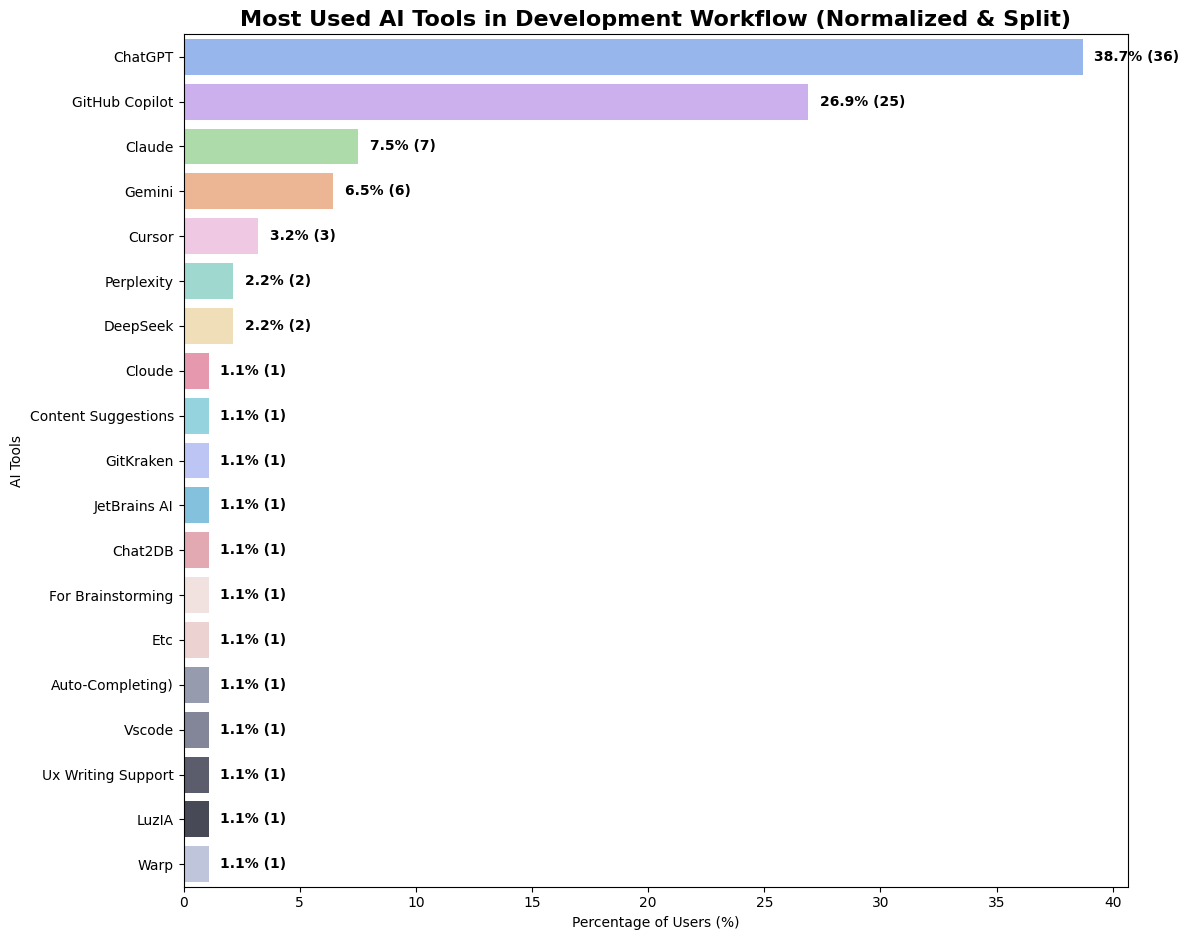

In [498]:
create_ai_tools_visualization(
    ai_tools_stats, "Most Used AI Tools in Development Workflow (Normalized & Split)"
)

In [499]:
# Apply the column mapping to rename columns in the dataframe
ai_assisted_development_data = ai_assisted_development_data

# Now filter for AI IDE users using the correct column name
ai_ide_users = ai_assisted_development_data.filter(pl.col("uses_ai_ide") == "Yes")
ai_ide_users

role,experience_years,programming_languages,tools_frameworks,ides_editors,ai_familiarity,used_ai_tools,ai_tools_used,ai_tool_tasks,ai_improves_productivity,ai_improves_code_quality,ai_trust,ai_privacy_concern,uses_ai_ide,ai_ide_types,uses_ask_mode,uses_edit_mode,uses_agent_mode,generates_unit_tests,generates_documentation,ai_ide_productivity,ai_ide_learning,ai_ide_code_quality,ai_ide_code_quality_dup,ai_ide_reduces_search,ai_ide_over_reliance,ai_ide_workflow_integration,ai_ide_security_concern,ai_ide_challenges,additional_comments,reasons_not_using_ai_ide,additional_comments_dup,ai_tools_workflow
str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str
"""Data Scientist / AI / Machine …","""1-3 years""","""Python""",""".Net""","""VS Code, Visual Studio""","""Very familiar""","""Yes""","""Code""","""Generating code snippets, Expl…",4,3,2,3,"""Yes""","""GitHub Copilot (within VS Code…",3,1,2,3,4,3,3,3,3,4,3,3,2,"""Needs more context to get it r…","""No""","""Worried about code quality/cor…","""No""",null
"""Full-stack Developer""","""More than 10 years""","""Java, JavaScript, TypeScript, …","""Springboot, Maven, Graddle, No…","""VS Code, IntelliJ IDEA""","""Very familiar""","""Yes""",null,"""Generating code snippets, Expl…",4,4,1,3,"""Yes""","""GitHub Copilot (within VS Code…",3,3,2,3,3,4,4,2,null,4,2,2,3,"""hallucinations and having to w…","""I believe we should promote co…",null,null,"""ChatGPT, Gemini, DeepSeek, Cop…"
"""Data Scientist / AI / Machine …","""Less than 1 year""","""Python""","""uv""","""VS Code""","""Very familiar""","""Yes""",null,"""Generating code snippets, Expl…",4,4,2,4,"""Yes""","""GitHub Copilot (within VS Code…",4,3,2,1,4,4,4,3,null,4,2,3,3,"""Sometimes I cannot give it som…","""There should be a short manual…",null,null,"""Chatgpt, Copilot"""
"""Data Scientist / AI / Machine …","""Less than 1 year""","""JavaScript, TypeScript, Python""","""Poetry, npm, Next.JS, Node.JS""","""VS Code""","""Very familiar""","""Yes""",null,"""Generating code snippets, Expl…",4,4,3,4,"""Yes""","""GitHub Copilot (within VS Code…",3,4,2,2,4,4,4,2,null,4,3,4,4,"""Constantly having to correct t…",null,null,null,"""ChatGPT, Copilot, Gemini"""
"""Software Developer (Backend)""","""More than 10 years""","""JavaScript, TypeScript, Bash""","""Nodejs with NPM, AWS CLI, AWS …","""VS Code""","""Very familiar""","""Yes""",null,"""Generating code snippets, Expl…",2,2,1,3,"""Yes""","""GitHub Copilot (within VS Code…",3,2,2,3,3,3,2,2,null,3,2,3,3,"""Inconsistencies generating cod…","""1. Would be good to do company…",null,null,"""GitHub Copilot, ChatGPT"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Software Developer (Backend)""","""7-10 years""","""TypeScript""","""AWS CDK, NodeJS""","""VS Code""","""Extremely familiar""","""Yes""",null,"""Explaining code, Debugging ass…",3,2,2,2,"""Yes""","""GitHub Copilot (within VS Code…",3,3,1,2,3,3,3,2,null,3,1,2,2,"""Code Quality""",null,null,null,"""ChatGPT, Copilot"""
"""Software Developer (Backend)""","""7-10 years""","""JavaScript, TypeScript""","""Node js ""","""WebStorm""","""Slightly familiar""","""Yes""",null,"""Generating code snippets, Writ…",2,1,2,4,"""Yes""","""GitHub Copilot (within VS Code…",2,1,3,2,4,2,2,1,null,4,2,3,4,"""Sometimes it generates code th…",null,null,null,"""Copilot"""
"""Software Developer (Frontend)""","""4-6 years""","""JavaScript, TypeScript""","""React and React Native""","""VS Code""","""Slightly familiar""","""Yes""",null,"""Generating code snippets, Debu…",3,3,2,2,"""Yes""","""GitHub Copilot (within VS Code…",2,3,1,3,2,3,3,3,null,4,2,3,2,"""I haven't think about it""","""No""",null,null,"""Copilot and Chat GPT"""


In [500]:
not_ai_users = ai_assisted_development_data.filter(pl.col("uses_ai_ide") == "No")
not_ai_users

role,experience_years,programming_languages,tools_frameworks,ides_editors,ai_familiarity,used_ai_tools,ai_tools_used,ai_tool_tasks,ai_improves_productivity,ai_improves_code_quality,ai_trust,ai_privacy_concern,uses_ai_ide,ai_ide_types,uses_ask_mode,uses_edit_mode,uses_agent_mode,generates_unit_tests,generates_documentation,ai_ide_productivity,ai_ide_learning,ai_ide_code_quality,ai_ide_code_quality_dup,ai_ide_reduces_search,ai_ide_over_reliance,ai_ide_workflow_integration,ai_ide_security_concern,ai_ide_challenges,additional_comments,reasons_not_using_ai_ide,additional_comments_dup,ai_tools_workflow
str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str
"""QA Engineer / Tester""","""More than 10 years""","""JavaScript, Python""","""Postman""","""VS Code, PyCharm""","""Slightly familiar""","""Yes""",null,"""Generating code snippets, Lear…",3,1,2,2,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Not familiar with them""",null,"""ChatGpt, LuzIA, perplexity"""
"""Software Developer (Frontend)""","""More than 10 years""","""JavaScript, TypeScript""","""Vite, Webpack, Turbopack, npm,…","""VS Code""","""Slightly familiar""","""Yes""",null,"""Generating code snippets, Expl…",3,3,2,2,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Cost/Licensing concerns, My cu…","""Yes we should have workshops o…","""ChatGPT"""
"""Software Developer (Frontend)""","""More than 10 years""","""C#, JavaScript, TypeScript, Py…","""TypeScript, JavaScript, C#""","""VS Code, IntelliJ IDEA, Eclips…","""Slightly familiar""","""No""",null,null,null,null,null,null,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Security concerns / Company po…",null,null
"""Software Developer (Backend)""","""More than 10 years""","""C#""",""".Net Core, .Net Framework""","""VS Code, Visual Studio""","""Slightly familiar""","""Yes""",null,"""Generating code snippets, Expl…",3,3,3,3,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Cost/Licensing concerns""",null,"""ChatGPT"""
"""Software Developer (Frontend)""","""7-10 years""","""JavaScript, TypeScript""","""VueJS, node, npm, yarn, lerna""","""VS Code""","""Slightly familiar""","""Yes""",null,"""Generating code snippets""",3,3,2,4,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Security concerns / Company po…","""On the project I work the cust…","""ChatGPT"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Software Developer (Frontend)""","""More than 10 years""","""JavaScript, PHP""","""Wordpress""","""PHPStorm""","""Slightly familiar""","""Yes""",null,"""Learning new concepts/technolo…",3,3,2,3,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""My current IDE/tools are suffi…",null,"""ChatGPT"""
"""Software Developer (Frontend)""","""More than 10 years""","""JavaScript, TypeScript, Ruby""","""NPM, PNPM, React""","""VS Code""","""Slightly familiar""","""No""",null,null,null,null,null,null,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Security concerns / Company po…",null,null
"""UX/UI Designer""","""1-3 years""","""N/A""","""do not work with programming l…","""N/A""","""Slightly familiar""","""Yes""",null,"""Brainstorming ideas, Summarizi…",3,3,3,3,"""No""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Not familiar with them""","""I see value in AI tools for de…","""ChatGPT, for brainstorming, co…"


In [501]:
not_ai_users_at_all = ai_assisted_development_data.filter(
    pl.col("used_ai_tools") == "No"
)
not_ai_users_at_all = not_ai_users_at_all.select(*BASE_COLUMNS)
not_ai_users_at_all

role,experience_years,programming_languages,tools_frameworks,ides_editors,ai_familiarity,reasons_not_using_ai_ide,additional_comments
str,str,str,str,str,str,str,str
"""Software Developer (Frontend)""","""More than 10 years""","""C#, JavaScript, TypeScript, Py…","""TypeScript, JavaScript, C#""","""VS Code, IntelliJ IDEA, Eclips…","""Slightly familiar""","""Security concerns / Company po…",null
"""Software Developer (Frontend)""","""More than 10 years""","""JavaScript, TypeScript, Ruby""","""NPM, PNPM, React""","""VS Code""","""Slightly familiar""","""Security concerns / Company po…",null


## 6. Programming Languages Analysis

In [502]:
def extract_programming_languages(language_string: str) -> List[str]:
    """
    Extract individual programming languages from a comma-separated string.

    Args:
        language_string: Comma-separated string of programming languages (can be None/null)

    Returns:
        List of individual programming languages
    """
    if language_string is None or not language_string:
        return []

    # Split by comma and clean up
    languages = []
    for item in str(language_string).split(","):
        # Split by various separators that might appear
        for separator in [";", "&", " and ", "/"]:
            if separator in item:
                sub_languages = [lang.strip() for lang in item.split(separator)]
                languages.extend(sub_languages)
                break
        else:
            # No separator found, add the item as is
            languages.append(item.strip())

    return [lang for lang in languages if lang.strip()]


def normalize_language_name(language_name: str) -> str:
    """
    Normalize programming language names by handling common variations.

    Args:
        language_name: Original language name string

    Returns:
        Normalized language name
    """
    if not language_name:
        return ""

    normalized = language_name.lower().strip()

    # Define mapping for common language variations
    language_mappings = {
        "javascript": "JavaScript",
        "js": "JavaScript",
        "typescript": "TypeScript",
        "ts": "TypeScript",
        "python": "Python",
        "py": "Python",
        "java": "Java",
        "c++": "C++",
        "cpp": "C++",
        "c#": "C#",
        "csharp": "C#",
        "c sharp": "C#",
        "go": "Go",
        "golang": "Go",
        "rust": "Rust",
        "php": "PHP",
        "ruby": "Ruby",
        "swift": "Swift",
        "kotlin": "Kotlin",
        "dart": "Dart",
        "html": "HTML",
        "css": "CSS",
        "sql": "SQL",
        "bash": "Bash",
        "shell": "Bash",
        "powershell": "PowerShell",
        "r": "R",
        "matlab": "MATLAB",
        "scala": "Scala",
        "perl": "Perl",
        "lua": "Lua",
        "haskell": "Haskell",
        "clojure": "Clojure",
        "elixir": "Elixir",
        "erlang": "Erlang",
        "f#": "F#",
        "objective-c": "Objective-C",
        "c": "C",
    }

    # Check for exact matches first
    if normalized in language_mappings:
        return language_mappings[normalized]

    # Check for partial matches
    for key, value in language_mappings.items():
        if key in normalized or normalized in key:
            return value

    # If no mapping found, return title case version
    return language_name.title()


def analyze_programming_languages(
    df: pl.DataFrame, column_name: str = "programming_languages"
) -> pl.DataFrame:
    """
    Analyze programming language usage from survey data.

    Args:
        df: DataFrame containing survey responses
        column_name: Column name containing programming languages information

    Returns:
        DataFrame with comprehensive programming language usage statistics
    """
    all_languages = []

    # Filter out null values and extract all languages
    languages_raw = (
        df.filter(pl.col(column_name).is_not_null()).select(column_name).to_series()
    )

    for language_string in languages_raw:
        if language_string is not None:
            languages = extract_programming_languages(language_string)
            # Normalize each language name
            normalized_languages = [
                normalize_language_name(lang) for lang in languages if lang.strip()
            ]
            all_languages.extend(normalized_languages)

    # Remove empty strings
    clean_languages = [lang for lang in all_languages if lang.strip()]

    # Count the occurrences of each language
    language_counts = (
        pl.Series(clean_languages).value_counts().sort(by="count", descending=True)
    )
    language_counts.columns = ["language", "count"]

    # Calculate percentages
    total_mentions = language_counts["count"].sum()
    language_stats = language_counts.with_columns(
        (pl.col("count") / total_mentions * 100).alias("percentage")
    )

    return language_stats


def create_programming_languages_visualization(
    language_stats: pl.DataFrame, title: str = "Most Used Programming Languages"
) -> None:
    """
    Create a horizontal bar chart visualization for programming language usage.

    Args:
        language_stats: DataFrame with language statistics
        title: Chart title
    """
    plt.figure(
        figsize=(WIDE_PLOT_SIZE[0], max(WIDE_PLOT_SIZE[1], len(language_stats) * 0.4))
    )

    # Create extended color palette to handle any number of languages
    colors = get_extended_catppuccin_palette(len(language_stats))

    # Create horizontal bar plot
    ax = sns.barplot(
        data=language_stats,
        x="count",
        y="language",
        hue="language",
        legend=False,
        palette=colors,
    )

    # Add count labels on the bars
    for i, (count, percentage) in enumerate(
        zip(language_stats["count"], language_stats["percentage"])
    ):
        ax.text(
            count + 0.5,
            i,
            f"{count} ({percentage:.1f}%)",
            va="center",
            fontweight="bold",
        )

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Number of Developers")
    plt.ylabel("Programming Languages")
    plt.tight_layout()
    plt.show()


# Execute the programming languages analysis
programming_languages_stats = analyze_programming_languages(
    ai_assisted_development_data, "programming_languages"
)

# Display the results
programming_languages_stats

language,count,percentage
str,u32,f64
"""JavaScript""",37,30.327869
"""TypeScript""",31,25.409836
"""Python""",19,15.57377
"""Java""",11,9.016393
"""C#""",9,7.377049
…,…,…
"""Go""",3,2.459016
"""Bash""",2,1.639344
"""Delphi""",1,0.819672


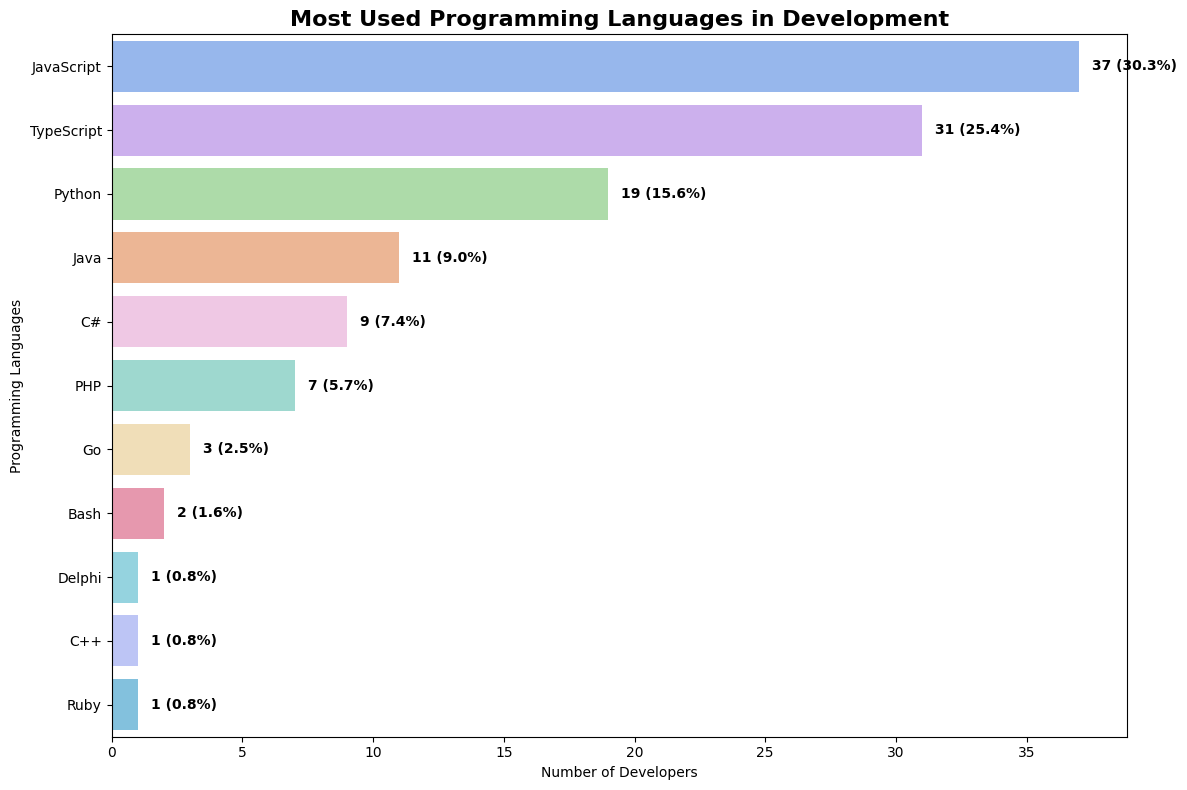

In [503]:
# Create programming languages visualization
create_programming_languages_visualization(
    programming_languages_stats, "Most Used Programming Languages in Development"
)

## 7. Most Common AI Tool Uses

In [504]:
def extract_ai_tool_tasks(task_string: str) -> List[str]:
    """
    Extract individual AI tool tasks from a comma-separated string.

    Args:
        task_string: Comma-separated string of AI tool tasks (can be None/null)

    Returns:
        List of individual AI tool tasks
    """
    if task_string is None or not task_string:
        return []

    # Split by comma and clean up
    tasks = []
    for item in str(task_string).split(","):
        # Split by various separators that might appear
        for separator in [";", "&", " and ", "/"]:
            if separator in item:
                sub_tasks = [task.strip() for task in item.split(separator)]
                tasks.extend(sub_tasks)
                break
        else:
            # No separator found, add the item as is
            tasks.append(item.strip())

    return [task for task in tasks if task.strip()]


def normalize_task_name(task_name: str) -> str:
    """
    Normalize AI tool task names by handling common variations and patterns.

    Args:
        task_name: Original task name string

    Returns:
        Normalized task name
    """
    if not task_name:
        return ""

    normalized = task_name.lower().strip()

    # Define mapping for common task variations
    task_mappings = {
        # Code generation and writing
        "code generation": "Code Generation",
        "generating code": "Code Generation",
        "writing code": "Code Generation",
        "code writing": "Code Generation",
        "coding": "Code Generation",
        "auto-completion": "Code Generation",
        "autocompletion": "Code Generation",
        "code completion": "Code Generation",
        # Debugging and troubleshooting
        "debugging": "Debugging",
        "debug": "Debugging",
        "troubleshooting": "Debugging",
        "bug fixing": "Debugging",
        "error fixing": "Debugging",
        "finding bugs": "Debugging",
        # Code review and improvement
        "code review": "Code Review",
        "reviewing code": "Code Review",
        "code optimization": "Code Optimization",
        "optimizing code": "Code Optimization",
        "refactoring": "Code Refactoring",
        "code refactoring": "Code Refactoring",
        # Documentation
        "documentation": "Documentation",
        "writing documentation": "Documentation",
        "generating documentation": "Documentation",
        "comments": "Documentation",
        "code comments": "Documentation",
        # Learning and research
        "learning": "Learning/Research",
        "research": "Learning/Research",
        "understanding code": "Learning/Research",
        "explaining code": "Learning/Research",
        "code explanation": "Learning/Research",
        # Testing
        "testing": "Testing",
        "unit testing": "Testing",
        "test generation": "Testing",
        "generating tests": "Testing",
        "writing tests": "Testing",
        # Problem solving
        "problem solving": "Problem Solving",
        "solving problems": "Problem Solving",
        "brainstorming": "Problem Solving",
        "ideation": "Problem Solving",
        # Architecture and design
        "architecture": "Architecture/Design",
        "system design": "Architecture/Design",
        "design patterns": "Architecture/Design",
        "planning": "Architecture/Design",
    }

    # Check for exact matches first
    if normalized in task_mappings:
        return task_mappings[normalized]

    # Check for partial matches (contains key terms)
    for key, value in task_mappings.items():
        if key in normalized:
            return value

    # Special handling for common patterns
    if "generat" in normalized and "code" in normalized:
        return "Code Generation"
    elif "debug" in normalized or "error" in normalized or "bug" in normalized:
        return "Debugging"
    elif "document" in normalized or "comment" in normalized:
        return "Documentation"
    elif "test" in normalized:
        return "Testing"
    elif "learn" in normalized or "explain" in normalized:
        return "Learning/Research"
    elif "review" in normalized:
        return "Code Review"
    elif "optim" in normalized or "refactor" in normalized:
        return "Code Optimization"

    # If no mapping found, return title case version
    return task_name.title()


def analyze_ai_tool_tasks(
    df: pl.DataFrame, column_name: str = "ai_tool_tasks"
) -> pl.DataFrame:
    """
    Analyze AI tool task usage from survey data.

    Args:
        df: DataFrame containing survey responses
        column_name: Column name containing AI tool tasks information

    Returns:
        DataFrame with comprehensive AI tool task usage statistics
    """
    all_tasks = []

    # Filter out null values and extract all tasks
    tasks_raw = (
        df.filter(pl.col(column_name).is_not_null()).select(column_name).to_series()
    )

    for task_string in tasks_raw:
        if task_string is not None:
            tasks = extract_ai_tool_tasks(task_string)
            # Normalize each task name
            normalized_tasks = [
                normalize_task_name(task) for task in tasks if task.strip()
            ]
            all_tasks.extend(normalized_tasks)

    # Remove empty strings
    clean_tasks = [task for task in all_tasks if task.strip()]

    # Count the occurrences of each task
    task_counts = (
        pl.Series(clean_tasks).value_counts().sort(by="count", descending=True)
    )
    task_counts.columns = ["task", "count"]

    # Calculate percentages
    total_mentions = task_counts["count"].sum()
    task_stats = task_counts.with_columns(
        (pl.col("count") / total_mentions * 100).alias("percentage")
    )

    return task_stats


def create_ai_tasks_visualization(
    task_stats: pl.DataFrame, title: str = "Most Common AI Tool Uses"
) -> None:
    """
    Create a horizontal bar chart visualization for AI tool task usage.

    Args:
        task_stats: DataFrame with task statistics
        title: Chart title
    """
    plt.figure(
        figsize=(WIDE_PLOT_SIZE[0], max(WIDE_PLOT_SIZE[1], len(task_stats) * 0.5))
    )

    # Create extended color palette to handle any number of tasks
    colors = get_extended_catppuccin_palette(len(task_stats))

    # Create horizontal bar plot
    ax = sns.barplot(
        data=task_stats, x="count", y="task", hue="task", legend=False, palette=colors
    )

    # Add count labels on the bars
    for i, (count, percentage) in enumerate(
        zip(task_stats["count"], task_stats["percentage"])
    ):
        ax.text(
            count + 0.5,
            i,
            f"{count} ({percentage:.1f}%)",
            va="center",
            fontweight="bold",
        )

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Number of Responses")
    plt.ylabel("AI Tool Tasks")
    plt.tight_layout()
    plt.show()


# Execute the AI tool tasks analysis
ai_tool_tasks_stats = analyze_ai_tool_tasks(
    ai_assisted_development_data, "ai_tool_tasks"
)

# Display the results
ai_tool_tasks_stats

task,count,percentage
str,u32,f64
"""Documentation""",54,20.0
"""Learning/Research""",50,18.518519
"""Code Generation""",30,11.111111
"""Technologies""",26,9.62963
"""Problem Solving""",24,8.888889
…,…,…
"""Proofreading (Grammar""",14,5.185185
"""Spelling)""",14,5.185185
"""Admin Development Stuff""",1,0.37037


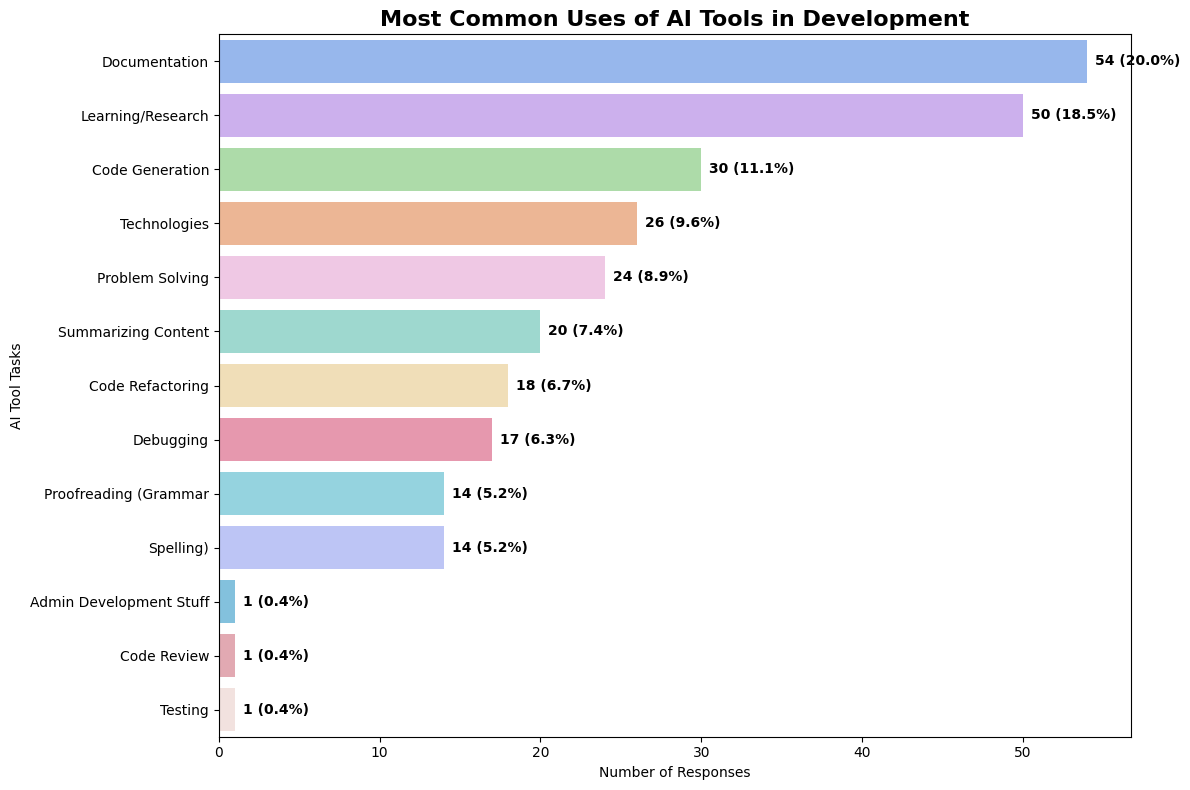

In [505]:
# Create AI tool tasks visualization
create_ai_tasks_visualization(
    ai_tool_tasks_stats, "Most Common Uses of AI Tools in Development"
)

## 8. AI Tool Uses by Experience Groups

In [506]:
def analyze_ai_tasks_by_experience(
    df: pl.DataFrame,
    tasks_column: str = "ai_tool_tasks",
    experience_column: str = "experience_years",
) -> pl.DataFrame:
    """
    Analyze AI tool task usage by experience groups.

    Args:
        df: DataFrame containing survey responses
        tasks_column: Column name containing AI tool tasks information
        experience_column: Column name containing experience years information

    Returns:
        DataFrame with AI tool task usage statistics by experience group
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    # Initialize list to store all task-experience combinations
    all_combinations = []

    # Filter out null values and process each response
    filtered_df = df.filter(
        pl.col(tasks_column).is_not_null() & pl.col(experience_column).is_not_null()
    )

    for row in filtered_df.iter_rows(named=True):
        experience = row[experience_column]
        tasks_string = row[tasks_column]

        if tasks_string and experience:
            # Extract and normalize tasks
            tasks = extract_ai_tool_tasks(tasks_string)
            normalized_tasks = [
                normalize_task_name(task) for task in tasks if task.strip()
            ]

            # Add each task-experience combination
            for task in normalized_tasks:
                if task.strip():
                    all_combinations.append(
                        {"experience_years": experience, "task": task}
                    )

    # Convert to DataFrame and analyze
    combinations_df = pl.DataFrame(all_combinations)

    if combinations_df.height == 0:
        return pl.DataFrame(
            {"experience_years": [], "task": [], "count": [], "percentage": []}
        )

    # Count combinations
    task_experience_counts = combinations_df.group_by(["experience_years", "task"]).agg(
        pl.len().alias("count")
    )

    # Calculate percentages within each experience group
    experience_totals = task_experience_counts.group_by("experience_years").agg(
        pl.col("count").sum().alias("total_count")
    )

    # Join and calculate percentages
    task_stats_by_exp = (
        task_experience_counts.join(experience_totals, on="experience_years")
        .with_columns(
            (pl.col("count") / pl.col("total_count") * 100).alias("percentage")
        )
        .drop("total_count")
    )

    # Add sort order and sort by experience then by count
    task_stats_by_exp = task_stats_by_exp.with_columns(
        pl.col("experience_years")
        .map_elements(
            lambda x: experience_order.index(x) if x in experience_order else 999,
            return_dtype=pl.Int32,
        )
        .alias("sort_order")
    ).sort(["sort_order", "count"], descending=[False, True])

    return task_stats_by_exp.drop("sort_order")


def get_top_tasks_by_experience(
    task_stats_df: pl.DataFrame, top_n: int = 5
) -> pl.DataFrame:
    """
    Get the top N tasks for each experience group.

    Args:
        task_stats_df: DataFrame with task statistics by experience
        top_n: Number of top tasks to return per experience group

    Returns:
        DataFrame with top tasks per experience group
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    top_tasks = []

    for exp_group in experience_order:
        exp_tasks = (
            task_stats_df.filter(pl.col("experience_years") == exp_group)
            .sort("count", descending=True)
            .limit(top_n)
        )
        top_tasks.append(exp_tasks)

    return pl.concat(top_tasks) if top_tasks else pl.DataFrame()


def create_tasks_by_experience_heatmap(
    task_stats_df: pl.DataFrame, title: str = "AI Tool Uses by Experience Groups"
) -> None:
    """
    Create a heatmap visualization showing AI tool tasks by experience groups.

    Args:
        task_stats_df: DataFrame with task statistics by experience
        title: Chart title
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    # Get all unique tasks and sort by overall popularity
    all_tasks = (
        task_stats_df.group_by("task")
        .agg(pl.col("count").sum().alias("total_count"))
        .sort("total_count", descending=True)
        .select("task")
        .to_series()
        .to_list()
    )

    # Create pivot table for heatmap
    pivot_data = []
    for exp in experience_order:
        row_data = []
        for task in all_tasks:
            # Find the percentage for this experience-task combination
            result = task_stats_df.filter(
                (pl.col("experience_years") == exp) & (pl.col("task") == task)
            ).select("percentage")

            if result.height > 0:
                row_data.append(result.item())
            else:
                row_data.append(0.0)
        pivot_data.append(row_data)

    # Create the heatmap
    plt.figure(
        figsize=(max(WIDE_PLOT_SIZE[0], len(all_tasks) * 0.8), WIDE_PLOT_SIZE[1])
    )

    import numpy as np

    # Create heatmap
    heatmap = sns.heatmap(
        pivot_data,
        xticklabels=all_tasks,
        yticklabels=experience_order,
        annot=True,
        fmt=".1f",
        cmap=[CATPPUCCIN["surface0"], CATPPUCCIN["blue"], CATPPUCCIN["mauve"]],
        cbar_kws={"label": "Percentage (%)"},
    )

    plt.title(title, fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("AI Tool Tasks", fontweight="bold")
    plt.ylabel("Years of Experience", fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def create_top_tasks_by_experience_visualization(
    top_tasks_df: pl.DataFrame, title: str = "Top AI Tool Uses by Experience Group"
) -> None:
    """
    Create a grouped bar chart showing top tasks for each experience group.

    Args:
        top_tasks_df: DataFrame with top tasks by experience
        title: Chart title
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    fig, axes = plt.subplots(
        1, len(experience_order), figsize=(WIDE_PLOT_SIZE[0] * 1.5, WIDE_PLOT_SIZE[1])
    )

    # Create extended color palette to handle any number of tasks
    colors = get_extended_catppuccin_palette(10)  # Enough colors for different tasks

    for i, exp_group in enumerate(experience_order):
        exp_data = top_tasks_df.filter(pl.col("experience_years") == exp_group)

        if exp_data.height > 0:
            ax = axes[i] if len(experience_order) > 1 else axes

            # Create bar plot
            bars = ax.barh(
                range(len(exp_data)),
                exp_data["percentage"],
                color=colors[: len(exp_data)],
            )

            # Customize the subplot
            ax.set_yticks(range(len(exp_data)))
            ax.set_yticklabels(exp_data["task"], fontsize=8)
            ax.set_xlabel("Percentage (%)", fontsize=10)
            ax.set_title(
                f"{exp_group}\n({exp_data['count'].sum()} responses)",
                fontsize=11,
                fontweight="bold",
            )
            ax.set_xlim(0, max(100, exp_data["percentage"].max() * 1.1))

            # Add percentage labels
            for j, (bar, pct) in enumerate(zip(bars, exp_data["percentage"])):
                ax.text(pct + 1, j, f"{pct:.1f}%", va="center", fontsize=8)

    plt.suptitle(title, fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()


# Execute the analysis
task_stats_by_experience = analyze_ai_tasks_by_experience(ai_assisted_development_data)
top_tasks_by_experience = get_top_tasks_by_experience(task_stats_by_experience, top_n=5)

# Display the detailed statistics
print("AI Tool Task Usage by Experience Groups:")
task_stats_by_experience

AI Tool Task Usage by Experience Groups:


experience_years,task,count,percentage
str,str,u32,f64
"""Less than 1 year""","""Documentation""",6,22.222222
"""Less than 1 year""","""Learning/Research""",5,18.518519
"""Less than 1 year""","""Technologies""",3,11.111111
"""Less than 1 year""","""Debugging""",3,11.111111
"""Less than 1 year""","""Code Generation""",3,11.111111
…,…,…,…
"""More than 10 years""","""Problem Solving""",10,8.130081
"""More than 10 years""","""Debugging""",9,7.317073
"""More than 10 years""","""Spelling)""",5,4.065041


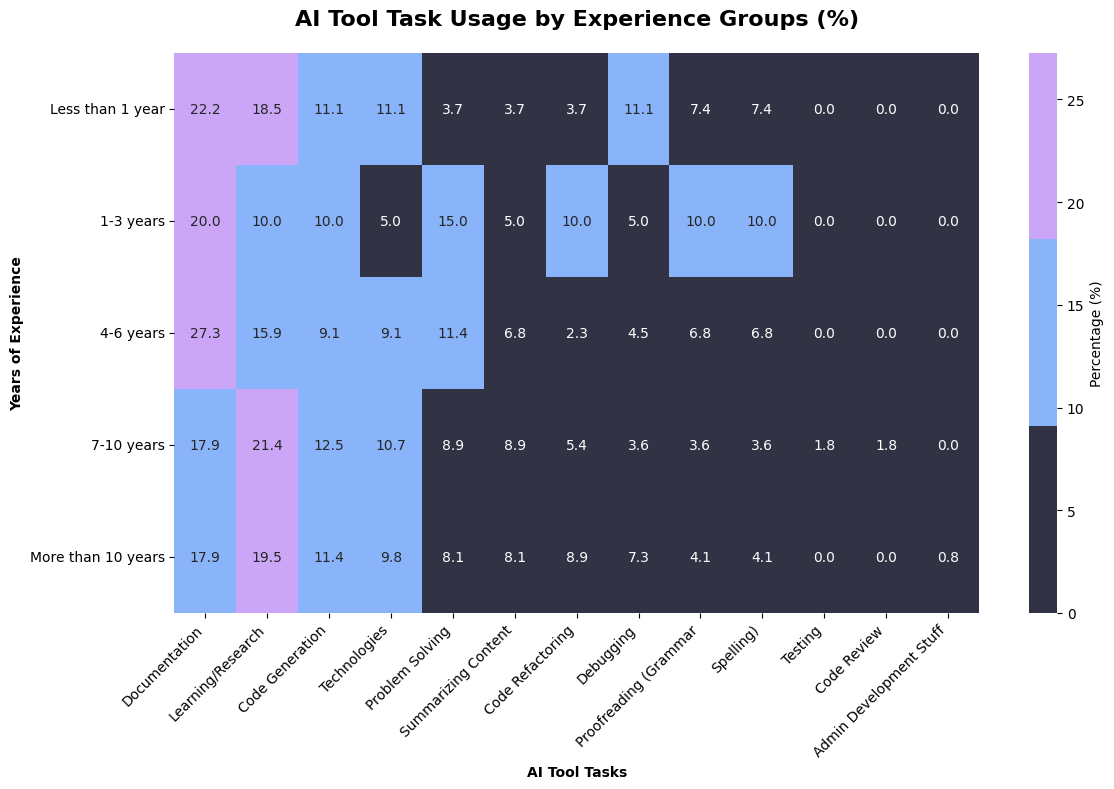

In [507]:
# Create heatmap visualization
create_tasks_by_experience_heatmap(
    task_stats_by_experience, "AI Tool Task Usage by Experience Groups (%)"
)

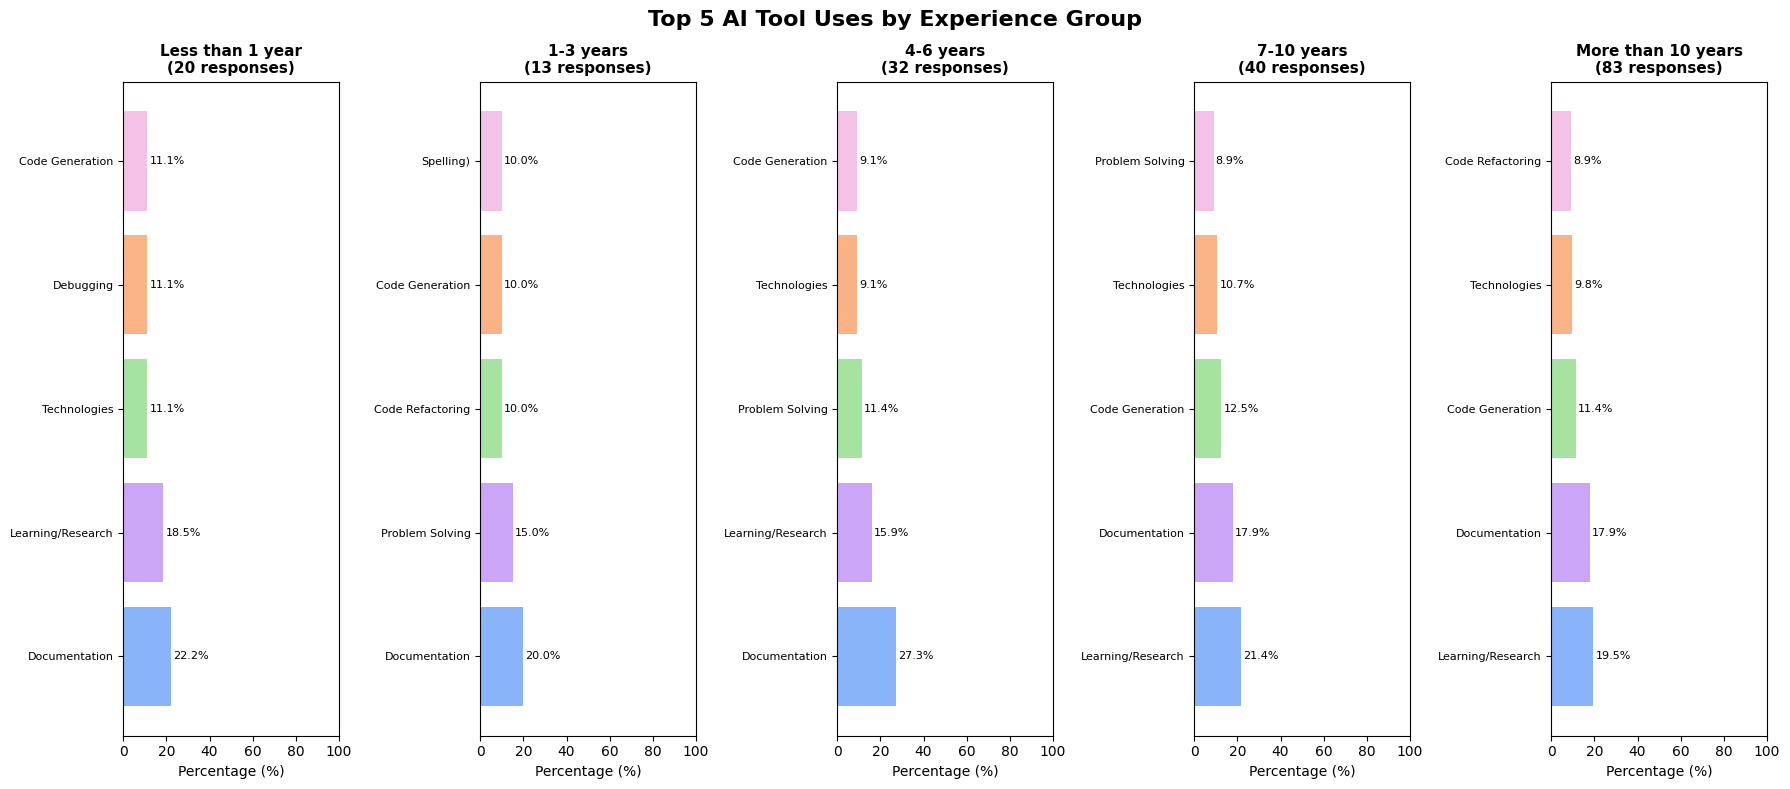

In [508]:
# Create grouped bar chart for top tasks by experience
create_top_tasks_by_experience_visualization(
    top_tasks_by_experience, "Top 5 AI Tool Uses by Experience Group"
)

In [509]:
# Display top tasks by experience group
print("Top 5 AI Tool Tasks by Experience Group:")
top_tasks_by_experience

Top 5 AI Tool Tasks by Experience Group:


experience_years,task,count,percentage
str,str,u32,f64
"""Less than 1 year""","""Documentation""",6,22.222222
"""Less than 1 year""","""Learning/Research""",5,18.518519
"""Less than 1 year""","""Technologies""",3,11.111111
"""Less than 1 year""","""Debugging""",3,11.111111
"""Less than 1 year""","""Code Generation""",3,11.111111
…,…,…,…
"""More than 10 years""","""Learning/Research""",24,19.512195
"""More than 10 years""","""Documentation""",22,17.886179
"""More than 10 years""","""Code Generation""",14,11.382114


## 9. AI IDE Modes Usage Analysis

In [510]:
def analyze_ai_ide_modes_usage(df: pl.DataFrame) -> pl.DataFrame:
    """
    Analyze the usage of different AI IDE modes (Ask, Edit, Agent) overall.

    Args:
        df: DataFrame containing survey responses

    Returns:
        DataFrame with AI IDE modes usage statistics
    """
    # Filter for AI IDE users only
    ai_ide_users = df.filter(pl.col("uses_ai_ide") == "Yes")

    if ai_ide_users.height == 0:
        return pl.DataFrame(
            {"mode": [], "users": [], "total_users": [], "percentage": []}
        )

    total_ai_ide_users = ai_ide_users.height

    # Count usage for each mode
    modes_usage = []

    # Ask mode (assuming values >= 3 indicate usage)
    ask_users = ai_ide_users.filter(pl.col("uses_ask_mode") >= 3).height
    modes_usage.append(
        {
            "mode": "Ask Mode",
            "users": ask_users,
            "total_users": total_ai_ide_users,
            "percentage": (ask_users / total_ai_ide_users * 100)
            if total_ai_ide_users > 0
            else 0,
        }
    )

    # Edit mode (assuming values >= 3 indicate usage)
    edit_users = ai_ide_users.filter(pl.col("uses_edit_mode") >= 3).height
    modes_usage.append(
        {
            "mode": "Edit Mode",
            "users": edit_users,
            "total_users": total_ai_ide_users,
            "percentage": (edit_users / total_ai_ide_users * 100)
            if total_ai_ide_users > 0
            else 0,
        }
    )

    # Agent mode (assuming values >= 3 indicate usage)
    agent_users = ai_ide_users.filter(pl.col("uses_agent_mode") >= 3).height
    modes_usage.append(
        {
            "mode": "Agent Mode",
            "users": agent_users,
            "total_users": total_ai_ide_users,
            "percentage": (agent_users / total_ai_ide_users * 100)
            if total_ai_ide_users > 0
            else 0,
        }
    )

    return pl.DataFrame(modes_usage).sort("percentage", descending=True)


def analyze_ai_ide_modes_by_experience(df: pl.DataFrame) -> pl.DataFrame:
    """
    Analyze AI IDE modes usage by experience groups.

    Args:
        df: DataFrame containing survey responses

    Returns:
        DataFrame with AI IDE modes usage statistics by experience group
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    # Filter for AI IDE users only
    ai_ide_users = df.filter(pl.col("uses_ai_ide") == "Yes")

    if ai_ide_users.height == 0:
        return pl.DataFrame(
            {
                "experience_years": [],
                "mode": [],
                "users": [],
                "total_users": [],
                "percentage": [],
            }
        )

    results = []

    for exp_group in experience_order:
        exp_users = ai_ide_users.filter(pl.col("experience_years") == exp_group)
        total_exp_users = exp_users.height

        if total_exp_users > 0:
            # Ask mode (assuming values >= 3 indicate usage)
            ask_users = exp_users.filter(pl.col("uses_ask_mode") >= 3).height
            results.append(
                {
                    "experience_years": exp_group,
                    "mode": "Ask Mode",
                    "users": ask_users,
                    "total_users": total_exp_users,
                    "percentage": (ask_users / total_exp_users * 100),
                }
            )

            # Edit mode (assuming values >= 3 indicate usage)
            edit_users = exp_users.filter(pl.col("uses_edit_mode") >= 3).height
            results.append(
                {
                    "experience_years": exp_group,
                    "mode": "Edit Mode",
                    "users": edit_users,
                    "total_users": total_exp_users,
                    "percentage": (edit_users / total_exp_users * 100),
                }
            )

            # Agent mode (assuming values >= 3 indicate usage)
            agent_users = exp_users.filter(pl.col("uses_agent_mode") >= 3).height
            results.append(
                {
                    "experience_years": exp_group,
                    "mode": "Agent Mode",
                    "users": agent_users,
                    "total_users": total_exp_users,
                    "percentage": (agent_users / total_exp_users * 100),
                }
            )

    # Convert to DataFrame and add sort order
    results_df = pl.DataFrame(results)
    if results_df.height > 0:
        results_df = results_df.with_columns(
            pl.col("experience_years")
            .map_elements(
                lambda x: experience_order.index(x) if x in experience_order else 999,
                return_dtype=pl.Int32,
            )
            .alias("sort_order")
        ).sort(["sort_order", "mode"])

    return results_df.drop("sort_order") if results_df.height > 0 else results_df


def create_ai_modes_overall_visualization(
    modes_stats: pl.DataFrame, title: str = "AI IDE Modes Usage"
) -> None:
    """
    Create a bar chart visualization for overall AI IDE modes usage.

    Args:
        modes_stats: DataFrame with modes usage statistics
        title: Chart title
    """
    plt.figure(figsize=WIDE_PLOT_SIZE)

    # Create color palette
    colors = CATPPUCCIN_QUALITATIVE[: len(modes_stats)]

    # Create bar plot
    ax = sns.barplot(
        data=modes_stats,
        x="mode",
        y="percentage",
        hue="mode",
        legend=False,
        palette=colors,
    )

    # Add percentage labels on the bars
    for i, (percentage, users, total) in enumerate(
        zip(modes_stats["percentage"], modes_stats["users"], modes_stats["total_users"])
    ):
        ax.text(
            i,
            percentage + 1,
            f"{percentage:.1f}%\n({users}/{total})",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=11,
        )

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("AI IDE Modes")
    plt.ylabel("Percentage of AI IDE Users (%)")
    plt.ylim(0, max(modes_stats["percentage"]) * 1.15)
    plt.tight_layout()
    plt.show()


def create_ai_modes_by_experience_visualization(
    modes_by_exp: pl.DataFrame, title: str = "AI IDE Modes Usage by Experience Groups"
) -> None:
    """
    Create a grouped bar chart showing AI IDE modes usage by experience groups.

    Args:
        modes_by_exp: DataFrame with modes usage by experience
        title: Chart title
    """
    plt.figure(figsize=(WIDE_PLOT_SIZE[0] * 1.2, WIDE_PLOT_SIZE[1]))

    # Define custom order for experience years and modes
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]
    modes_order = ["Ask Mode", "Edit Mode", "Agent Mode"]
    colors = CATPPUCCIN_QUALITATIVE[: len(modes_order)]

    # Prepare data for plotting
    x_pos = range(len(experience_order))
    bar_width = 0.25

    # Create bars for each mode
    for i, mode in enumerate(modes_order):
        mode_data = []
        for exp in experience_order:
            # Find percentage for this experience-mode combination
            result = modes_by_exp.filter(
                (pl.col("experience_years") == exp) & (pl.col("mode") == mode)
            ).select("percentage")

            if result.height > 0:
                mode_data.append(result.item())
            else:
                mode_data.append(0.0)

        # Calculate positions for this mode's bars
        positions = [x + i * bar_width for x in x_pos]

        # Create bars
        bars = plt.bar(
            positions, mode_data, bar_width, label=mode, color=colors[i], alpha=0.8
        )

        # Add percentage labels on bars
        for j, (bar, pct) in enumerate(zip(bars, mode_data)):
            if pct > 0:
                plt.text(
                    bar.get_x() + bar.get_width() / 2,
                    pct + 1,
                    f"{pct:.1f}%",
                    ha="center",
                    va="bottom",
                    fontsize=8,
                )

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Years of Experience")
    plt.ylabel("Percentage of AI IDE Users (%)")
    plt.legend(title="AI IDE Modes")

    # Set x-axis labels
    plt.xticks([x + bar_width for x in x_pos], experience_order, rotation=45)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()


def create_ai_modes_heatmap(
    modes_by_exp: pl.DataFrame, title: str = "AI IDE Modes Usage Heatmap"
) -> None:
    """
    Create a heatmap visualization for AI IDE modes usage by experience groups.

    Args:
        modes_by_exp: DataFrame with modes usage by experience
        title: Chart title
    """
    # Define custom order for experience years
    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]
    modes_order = ["Ask Mode", "Edit Mode", "Agent Mode"]

    # Create pivot table for heatmap
    pivot_data = []
    for exp in experience_order:
        row_data = []
        for mode in modes_order:
            # Find the percentage for this experience-mode combination
            result = modes_by_exp.filter(
                (pl.col("experience_years") == exp) & (pl.col("mode") == mode)
            ).select("percentage")

            if result.height > 0:
                row_data.append(result.item())
            else:
                row_data.append(0.0)
        pivot_data.append(row_data)

    # Create the heatmap
    plt.figure(figsize=WIDE_PLOT_SIZE)

    # Create heatmap
    heatmap = sns.heatmap(
        pivot_data,
        xticklabels=modes_order,
        yticklabels=experience_order,
        annot=True,
        fmt=".1f",
        cmap=[CATPPUCCIN["surface0"], CATPPUCCIN["blue"], CATPPUCCIN["mauve"]],
        cbar_kws={"label": "Percentage (%)"},
        vmin=0,
        vmax=100,
    )

    plt.title(title, fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("AI IDE Modes", fontweight="bold")
    plt.ylabel("Years of Experience", fontweight="bold")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Execute the AI IDE modes analysis
ai_modes_overall = analyze_ai_ide_modes_usage(ai_assisted_development_data)
ai_modes_by_experience = analyze_ai_ide_modes_by_experience(
    ai_assisted_development_data
)

# Display the overall statistics
print("Overall AI IDE Modes Usage:")
print(
    f"Total AI IDE Users: {ai_modes_overall['total_users'][0] if ai_modes_overall.height > 0 else 0}"
)
print()
ai_modes_overall

Overall AI IDE Modes Usage:
Total AI IDE Users: 29



mode,users,total_users,percentage
str,i64,i64,f64
"""Ask Mode""",24,29,82.758621
"""Edit Mode""",16,29,55.172414
"""Agent Mode""",9,29,31.034483


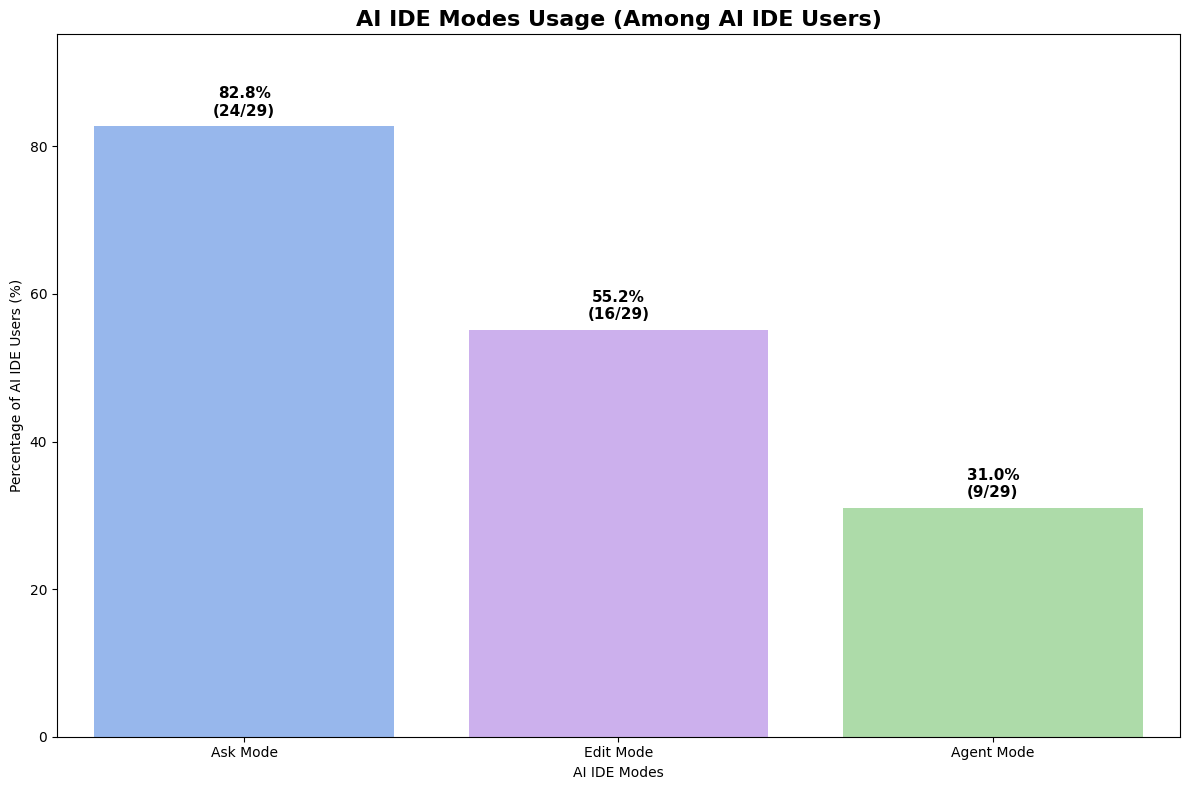

In [511]:
# Create overall AI IDE modes visualization
create_ai_modes_overall_visualization(
    ai_modes_overall, "AI IDE Modes Usage (Among AI IDE Users)"
)

In [512]:
# Display AI IDE modes usage by experience groups
print("AI IDE Modes Usage by Experience Groups:")
ai_modes_by_experience

AI IDE Modes Usage by Experience Groups:


experience_years,mode,users,total_users,percentage
str,str,i64,i64,f64
"""Less than 1 year""","""Agent Mode""",0,3,0.0
"""Less than 1 year""","""Ask Mode""",3,3,100.0
"""Less than 1 year""","""Edit Mode""",2,3,66.666667
"""1-3 years""","""Agent Mode""",0,2,0.0
"""1-3 years""","""Ask Mode""",2,2,100.0
…,…,…,…,…
"""7-10 years""","""Ask Mode""",6,9,66.666667
"""7-10 years""","""Edit Mode""",4,9,44.444444
"""More than 10 years""","""Agent Mode""",4,9,44.444444


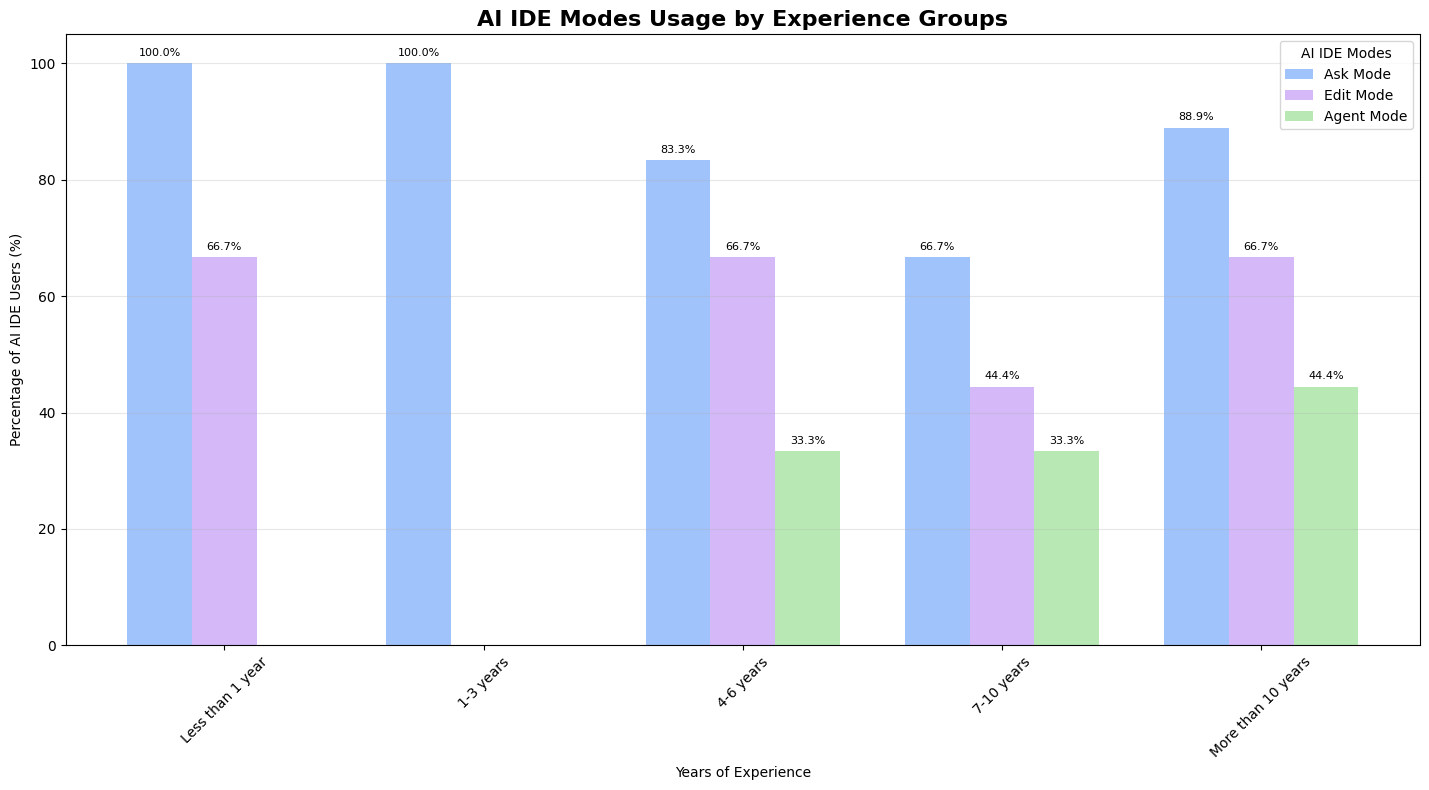

In [513]:
# Create grouped bar chart for AI IDE modes by experience
create_ai_modes_by_experience_visualization(
    ai_modes_by_experience, "AI IDE Modes Usage by Experience Groups"
)

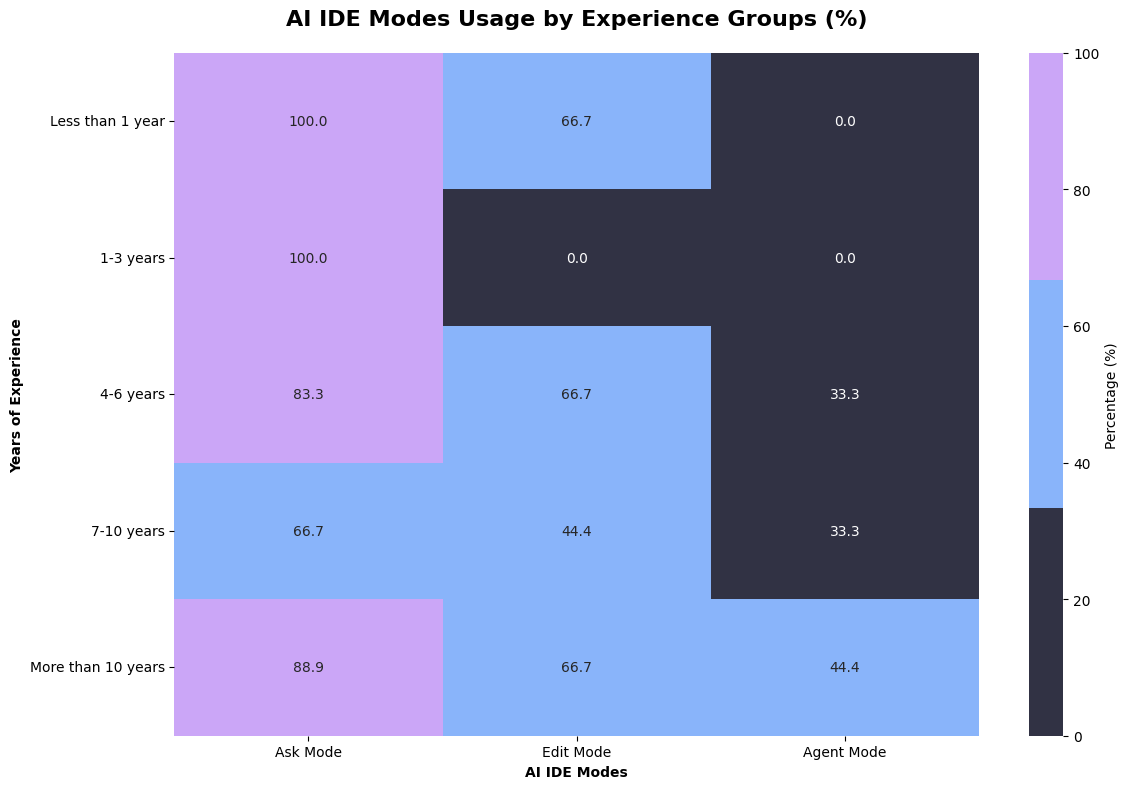

In [514]:
# Create heatmap for AI IDE modes by experience
create_ai_modes_heatmap(
    ai_modes_by_experience, "AI IDE Modes Usage by Experience Groups (%)"
)

## 10. AI IDE Perceptions and Attitudes Analysis

In [ ]:
def analyze_ai_ide_perceptions(df: pl.DataFrame) -> pl.DataFrame:
    """
    Analyze AI IDE perception responses across all perception-related columns.

    Args:
        df: DataFrame containing survey responses

    Returns:
        DataFrame with comprehensive perception statistics
    """
    # Define the perception columns and their display names
    perception_columns = {
        "ai_ide_productivity": "AI IDEs make me more productive",
        "ai_ide_learning": "AI IDEs help me learn APIs/libraries faster",
        "ai_ide_code_quality": "AI-generated code is generally high quality",
        "ai_ide_reduces_search": "I spend less time searching online",
        "ai_ide_over_reliance": "I rely too much on AI IDEs",
        "ai_ide_workflow_integration": "AI features integrate seamlessly",
        "ai_ide_security_concern": "I'm concerned about security/privacy",
    }

    # Define Likert scale mapping (assuming 1=Strongly Disagree, 5=Strongly Agree)
    likert_labels = {
        1: "Strongly Disagree",
        2: "Disagree",
        3: "Neutral",
        4: "Agree",
        5: "Strongly Agree",
    }

    # Filter for AI IDE users only
    ai_ide_users = df.filter(pl.col("uses_ai_ide") == "Yes")

    if ai_ide_users.height == 0:
        return pl.DataFrame(
            {"perception": [], "response": [], "count": [], "percentage": []}
        )

    results = []

    for col_name, display_name in perception_columns.items():
        # Skip if column doesn't exist
        if col_name not in ai_ide_users.columns:
            continue

        # Get response distribution for this perception
        responses = (
            ai_ide_users.filter(pl.col(col_name).is_not_null())
            .group_by(col_name)
            .agg(pl.len().alias("count"))
            .sort(col_name)
        )

        total_responses = responses["count"].sum()

        for row in responses.iter_rows(named=True):
            response_value = row[col_name]
            count = row["count"]

            # Map numeric response to label
            response_label = likert_labels.get(
                response_value, f"Response {response_value}"
            )

            results.append(
                {
                    "perception": display_name,
                    "response": response_label,
                    "response_value": response_value,
                    "count": count,
                    "percentage": (count / total_responses * 100)
                    if total_responses > 0
                    else 0,
                }
            )

    return pl.DataFrame(results)


def calculate_perception_summary_stats(perceptions_df: pl.DataFrame) -> pl.DataFrame:
    """
    Calculate summary statistics for each perception (mean, positive/negative percentages).

    Args:
        perceptions_df: DataFrame with detailed perception responses

    Returns:
        DataFrame with summary statistics for each perception
    """
    if perceptions_df.height == 0:
        return pl.DataFrame(
            {
                "perception": [],
                "mean_score": [],
                "positive_pct": [],
                "negative_pct": [],
                "neutral_pct": [],
            }
        )

    summary_stats = []

    for perception in perceptions_df["perception"].unique():
        perception_data = perceptions_df.filter(pl.col("perception") == perception)

        # Calculate weighted mean
        total_responses = perception_data["count"].sum()
        weighted_sum = (
            perception_data["response_value"] * perception_data["count"]
        ).sum()
        mean_score = weighted_sum / total_responses if total_responses > 0 else 0

        # Calculate positive (4-5), neutral (3), and negative (1-2) percentages
        positive_pct = perception_data.filter(pl.col("response_value") >= 4)[
            "percentage"
        ].sum()
        neutral_pct = perception_data.filter(pl.col("response_value") == 3)[
            "percentage"
        ].sum()
        negative_pct = perception_data.filter(pl.col("response_value") <= 2)[
            "percentage"
        ].sum()

        summary_stats.append(
            {
                "perception": perception,
                "mean_score": mean_score,
                "positive_pct": positive_pct,
                "negative_pct": negative_pct,
                "neutral_pct": neutral_pct,
                "total_responses": total_responses,
            }
        )

    return pl.DataFrame(summary_stats).sort("mean_score", descending=True)


def create_perceptions_stacked_bar_chart(
    perceptions_df: pl.DataFrame, title: str = "AI IDE Perceptions Distribution"
) -> None:
    """
    Create a stacked bar chart showing the distribution of responses for each perception.

    Args:
        perceptions_df: DataFrame with perception responses
        title: Chart title
    """
    import numpy as np

    # Get unique perceptions and responses
    perceptions = perceptions_df["perception"].unique().to_list()
    responses_order = [
        "Strongly Disagree",
        "Disagree",
        "Neutral",
        "Agree",
        "Strongly Agree",
    ]

    # Create colors (Catppuccin diverging palette for Likert scales)
    colors = CATPPUCCIN_DIVERGING

    plt.figure(figsize=(WIDE_PLOT_SIZE[0] * 1.2, WIDE_PLOT_SIZE[1]))

    # Prepare data matrix
    data_matrix = []
    for perception in perceptions:
        row_data = []
        for response in responses_order:
            # Find percentage for this perception-response combination
            result = perceptions_df.filter(
                (pl.col("perception") == perception) & (pl.col("response") == response)
            ).select("percentage")

            if result.height > 0:
                row_data.append(result.item())
            else:
                row_data.append(0.0)
        data_matrix.append(row_data)

    # Create stacked bars
    bar_width = 0.8
    indices = np.arange(len(perceptions))

    bottom = np.zeros(len(perceptions))

    for i, (response, color) in enumerate(zip(responses_order, colors)):
        values = [row[i] for row in data_matrix]
        plt.barh(
            indices,
            values,
            bar_width,
            left=bottom,
            label=response,
            color=color,
            alpha=0.8,
        )
        bottom += values

    plt.title(title, fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("Percentage (%)")
    plt.ylabel("Perceptions")
    plt.yticks(indices, [p[:50] + "..." if len(p) > 50 else p for p in perceptions])
    plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlim(0, 100)
    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()


def create_perceptions_summary_chart(
    summary_stats: pl.DataFrame, title: str = "AI IDE Perceptions Summary"
) -> None:
    """
    Create a horizontal bar chart showing mean scores and positive/negative sentiment.

    Args:
        summary_stats: DataFrame with summary statistics
        title: Chart title
    """
    plt.figure(figsize=WIDE_PLOT_SIZE)

    # Sort by mean score for better visualization
    summary_sorted = summary_stats.sort("mean_score", descending=True)

    y_pos = range(len(summary_sorted))

    # Create bars colored by mean score
    bars = plt.barh(
        y_pos,
        summary_sorted["mean_score"],
        color=[
            CATPPUCCIN["red"]
            if score < 2.5
            else CATPPUCCIN["peach"]
            if score < 3.5
            else CATPPUCCIN["green"]
            for score in summary_sorted["mean_score"]
        ],
        alpha=0.8,
    )

    # Add mean score labels
    for i, (bar, score, pos_pct, neg_pct) in enumerate(
        zip(
            bars,
            summary_sorted["mean_score"],
            summary_sorted["positive_pct"],
            summary_sorted["negative_pct"],
        )
    ):
        plt.text(
            score + 0.05,
            i,
            f"{score:.2f}\n(+{pos_pct:.0f}% | -{neg_pct:.0f}%)",
            va="center",
            fontsize=9,
            fontweight="bold",
        )

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Mean Score (1-5 scale)")
    plt.ylabel("Perceptions")
    plt.yticks(
        y_pos,
        [p[:60] + "..." if len(p) > 60 else p for p in summary_sorted["perception"]],
    )
    plt.xlim(0, 5.5)
    plt.grid(axis="x", alpha=0.3)

    # Add reference lines
    plt.axvline(x=3, color="gray", linestyle="--", alpha=0.5, label="Neutral (3.0)")
    plt.axvline(x=4, color="green", linestyle="--", alpha=0.5, label="Positive (4.0)")

    plt.legend()
    plt.tight_layout()
    plt.show()


def create_perceptions_by_experience_heatmap(
    df: pl.DataFrame, title: str = "AI IDE Perceptions by Experience"
) -> None:
    """
    Create a heatmap showing perception mean scores by experience groups.

    Args:
        df: DataFrame containing survey responses
        title: Chart title
    """
    # Define the perception columns and their display names
    perception_columns = {
        "ai_ide_productivity": "More productive",
        "ai_ide_learning": "Learn faster",
        "ai_ide_code_quality": "High quality code",
        "ai_ide_reduces_search": "Less searching",
        "ai_ide_over_reliance": "Over-reliance concern",
        "ai_ide_workflow_integration": "Seamless integration",
        "ai_ide_security_concern": "Security concern",
    }

    experience_order = [
        "Less than 1 year",
        "1-3 years",
        "4-6 years",
        "7-10 years",
        "More than 10 years",
    ]

    # Filter for AI IDE users only
    ai_ide_users = df.filter(pl.col("uses_ai_ide") == "Yes")

    if ai_ide_users.height == 0:
        return

    # Calculate mean scores for each experience-perception combination
    heatmap_data = []

    for exp_group in experience_order:
        row_data = []
        exp_users = ai_ide_users.filter(pl.col("experience_years") == exp_group)

        for col_name, display_name in perception_columns.items():
            if col_name in exp_users.columns and exp_users.height > 0:
                # Calculate mean score for this experience group and perception
                valid_responses = exp_users.filter(pl.col(col_name).is_not_null())
                if valid_responses.height > 0:
                    mean_score = valid_responses[col_name].mean()
                    row_data.append(mean_score)
                else:
                    row_data.append(np.nan)
            else:
                row_data.append(np.nan)

        heatmap_data.append(row_data)

    # Create the heatmap
    plt.figure(figsize=(WIDE_PLOT_SIZE[0], WIDE_PLOT_SIZE[1]))

    import numpy as np

    # Create heatmap
    heatmap = sns.heatmap(
        heatmap_data,
        xticklabels=list(perception_columns.values()),
        yticklabels=experience_order,
        annot=True,
        fmt=".2f",
        cmap=[
            CATPPUCCIN["red"],
            CATPPUCCIN["peach"],
            CATPPUCCIN["yellow"],
            CATPPUCCIN["green"],
            CATPPUCCIN["blue"],
        ],
        center=3,  # Center the colormap at neutral (3)
        vmin=1,
        vmax=5,
        cbar_kws={"label": "Mean Score (1-5)"},
    )

    plt.title(title, fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("AI IDE Perceptions", fontweight="bold")
    plt.ylabel("Years of Experience", fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Execute the AI IDE perceptions analysis
ai_perceptions_detailed = analyze_ai_ide_perceptions(ai_assisted_development_data)
ai_perceptions_summary = calculate_perception_summary_stats(ai_perceptions_detailed)

# Display the summary statistics
print("AI IDE Perceptions Summary Statistics:")
print("Based on responses from AI IDE users")
print()
ai_perceptions_summary

AI IDE Perceptions Summary Statistics:
Based on responses from AI IDE users



perception,mean_score,positive_pct,negative_pct,neutral_pct,total_responses
str,f64,f64,f64,f64,i64
"""AI IDEs make me more productiv…",3.344828,41.37931,6.896552,51.724138,29
"""I spend less time searching on…",3.310345,51.724138,17.241379,31.034483,29
"""AI IDEs help me learn APIs/lib…",3.241379,44.827586,17.241379,37.931034,29
"""AI features integrate seamless…",2.758621,13.793103,34.482759,51.724138,29
"""I'm concerned about security/p…",2.724138,17.241379,37.931034,44.827586,29
"""AI-generated code is generally…",2.448276,6.896552,55.172414,37.931034,29
"""I rely too much on AI IDEs""",2.206897,3.448276,72.413793,24.137931,29


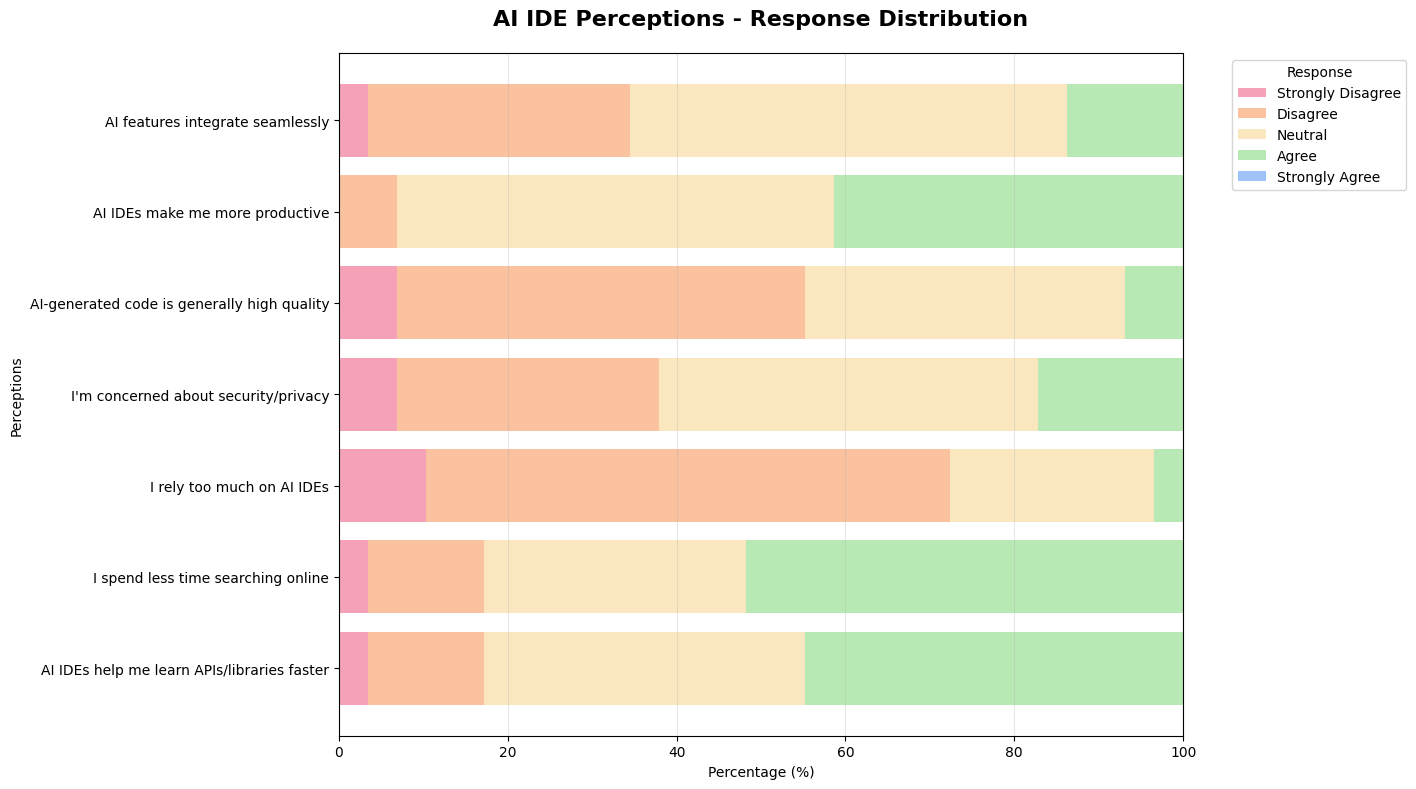

In [516]:
# Create stacked bar chart showing response distributions
create_perceptions_stacked_bar_chart(
    ai_perceptions_detailed, "AI IDE Perceptions - Response Distribution"
)

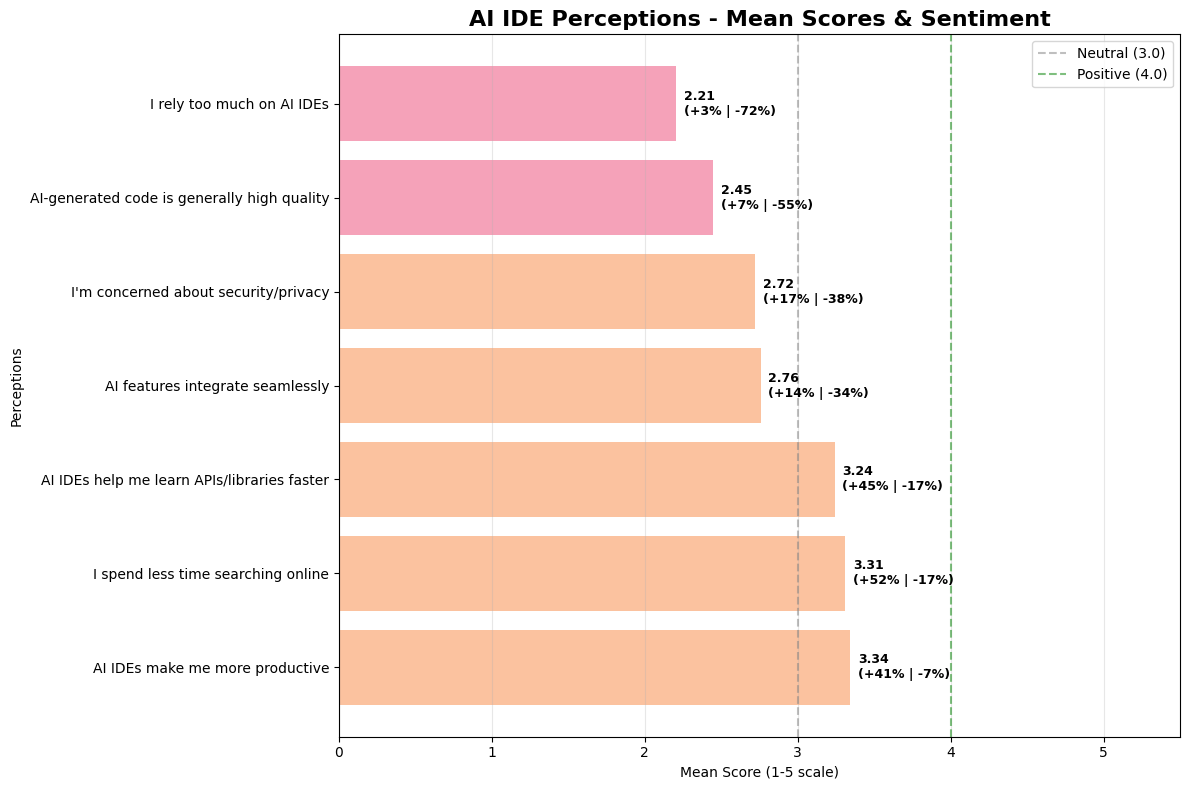

In [517]:
# Create summary chart showing mean scores and sentiment
create_perceptions_summary_chart(
    ai_perceptions_summary, "AI IDE Perceptions - Mean Scores & Sentiment"
)

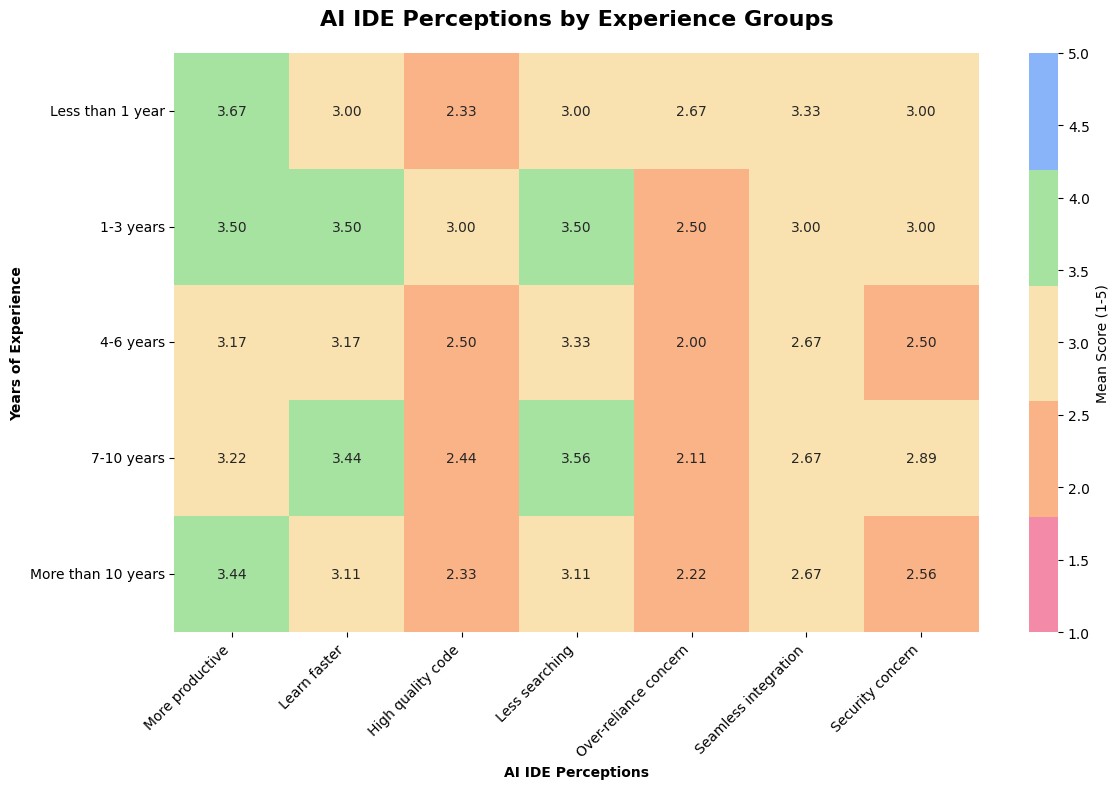

In [518]:
# Create heatmap showing perceptions by experience groups
create_perceptions_by_experience_heatmap(
    ai_assisted_development_data, "AI IDE Perceptions by Experience Groups"
)

In [519]:
# Display detailed breakdown of perceptions data
print("Detailed AI IDE Perceptions Breakdown:")
print("=" * 60)
print()

for perception in ai_perceptions_summary["perception"]:
    perception_data = ai_perceptions_detailed.filter(pl.col("perception") == perception)

    print(f"📊 {perception}")
    print("-" * 40)

    for row in perception_data.iter_rows(named=True):
        response = row["response"]
        count = row["count"]
        percentage = row["percentage"]
        print(f"  {response}: {count} responses ({percentage:.1f}%)")

    # Get summary stats
    summary_row = ai_perceptions_summary.filter(pl.col("perception") == perception)
    if summary_row.height > 0:
        mean_score = summary_row["mean_score"].item()
        positive_pct = summary_row["positive_pct"].item()
        negative_pct = summary_row["negative_pct"].item()
        neutral_pct = summary_row["neutral_pct"].item()

        print(f"  Mean Score: {mean_score:.2f}/5.0")
        print(
            f"  Sentiment: {positive_pct:.0f}% Positive | {neutral_pct:.0f}% Neutral | {negative_pct:.0f}% Negative"
        )

    print()

print("Key Insights:")
print("=" * 40)
print("✅ Most Positive: Productivity and time-saving benefits")
print("⚠️  Mixed: Learning and code quality perceptions")
print("❌ Most Negative: Over-reliance concerns (good sign!)")
print("🔍 Areas for Improvement: Workflow integration and code quality trust")

Detailed AI IDE Perceptions Breakdown:

📊 AI IDEs make me more productive
----------------------------------------
  Disagree: 2 responses (6.9%)
  Neutral: 15 responses (51.7%)
  Agree: 12 responses (41.4%)
  Mean Score: 3.34/5.0
  Sentiment: 41% Positive | 52% Neutral | 7% Negative

📊 I spend less time searching online
----------------------------------------
  Strongly Disagree: 1 responses (3.4%)
  Disagree: 4 responses (13.8%)
  Neutral: 9 responses (31.0%)
  Agree: 15 responses (51.7%)
  Mean Score: 3.31/5.0
  Sentiment: 52% Positive | 31% Neutral | 17% Negative

📊 AI IDEs help me learn APIs/libraries faster
----------------------------------------
  Strongly Disagree: 1 responses (3.4%)
  Disagree: 4 responses (13.8%)
  Neutral: 11 responses (37.9%)
  Agree: 13 responses (44.8%)
  Mean Score: 3.24/5.0
  Sentiment: 45% Positive | 38% Neutral | 17% Negative

📊 AI features integrate seamlessly
----------------------------------------
  Strongly Disagree: 1 responses (3.4%)
  Disagr